# Photosynthetic pigment extractions

In [96]:
# Libraries
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as ss

# Figures and plot settings
plt.rcParams['figure.figsize'] = [5, 2]#[50, 30]
plt.rcParams['figure.dpi'] = 600
kwargs = {'linestyle':':', 'c':'g', 'lw':3}
kwargs2 = {'linestyle':'-', 'c':'r', 'lw':3}

%matplotlib inline

## Paine protocol for Red algae pigment extraction
Pigment extraction and spectrophotometry of phycobilins; phycoerythrin (PE) and phycocyanin (PC).
- $ Phycoerythin \ (mg/ml)=((A_{564} - A_{592}) – (A_{455} - A_{592}) \ 0.20) * 0.12 $
- $ Phycocyanin \ (mg/ml) = ((A_{618} - A_{645}) – (A_{592} - A_{645}) 0.51) * 0.15 $
- $ Chlorophyll\ (mg/ml) = (13.7 x A_{665}) - (5.76 x A_{649}) $

Plotting the whole Absorbance spectra to visualize how the formula works. Notice PE in magenta and PC in 

### Prepare output dataframes

In [97]:
# Prepare sample dataframe
col_names = ['CE01A','CE01B','CE02','CE03','CE03B','CE04','GN02','GN03','GN04','GN05','GN06','GN07','GN08','GS03']
df_samples = pd.DataFrame(columns=col_names)

# Prepare pigment concentration dataframe.
# Different formulas
df_concentrations = pd.DataFrame(columns=['PE','PC','Chl','Pheo','K_APC','K_PC','K_PE','S_PC','S_PE'])

#### Phycobilins

In [98]:
# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Phycobillins")
csv_list = list(files_path.glob('*.csv'))
csv_phycobilins = csv_list # Later used for plots
df_weights = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_weights.csv", index_col=0)
df_area = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_area.csv", index_col=0)

In [99]:
samples_id = []
samples = []

#Phycobilins
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Cleaning dataframe
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    # Now we know where Absorbance values start, note header arg
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    #df_bin = df_bin.rename(columns={'Absorbance [A]': label})
    
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    
    samples.append(df[label])
    samples_id.append(label)

samples_df = pd.concat(samples, axis=1, ignore_index=True)
#samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin.index.name = 'Wavelength [nm]'
df_bin = df_bin.loc[400:800] # Only 380 - 800 nm wavelengths

df_bin

CE01A     CE01B      CE02      CE03     CE03B      CE04  \
Wavelength [nm]                                                               
400              0.247868 -0.010271  0.403584  0.377842  0.127446  0.290647   
401              0.248096 -0.010364  0.398428  0.373558  0.127442  0.288690   
402              0.248034 -0.012174  0.390691  0.369648  0.128133  0.287133   
403              0.247115 -0.012861  0.382159  0.365262  0.125290  0.282323   
404              0.245744 -0.012405  0.376768  0.360950  0.121458  0.276046   
...                   ...       ...       ...       ...       ...       ...   
796              0.189410  0.002394 -0.005800  0.002572 -0.008154 -0.007873   
797              0.189641  0.002434 -0.009980  0.002924 -0.007092 -0.006801   
798              0.189725  0.003448 -0.008721  0.002722 -0.007871 -0.007395   
799              0.190743  0.004136 -0.005650  0.002356 -0.005937 -0.005490   
800              0.190265  0.000002 -0.008654  0.002682 -0.003822 -0.002826   

                     GN02      GN03      GN04      GN05      GN06      GN07  \
Wavelength [nm]                                                               
400              0.230834  0.117026  0.242120  0.341564  0.226235  0.337366   
401              0.228479  0.114389  0.237539  0.334986  0.222127  0.332639   
402              0.226636  0.111440  0.232602  0.327838  0.217386  0.327512   
403              0.227226  0.112151  0.230624  0.322965  0.214295  0.322102   
404              0.227805  0.113166  0.230217  0.320512  0.213368  0.317492   
...                   ...       ...       ...       ...       ...       ...   
796              0.089037 -0.005435 -0.000331  0.003297  0.001576  0.003686   
797              0.091663 -0.001244  0.003733  0.007202  0.004870  0.004708   
798              0.092443 -0.000989  0.003341  0.006528  0.003508  0.005117   
799              0.091150 -0.001603  0.002192  0.004313  0.002138  0.004584   
800              0.090731 -0.001162  0.001241  0.003013  0.001214  0.004417   

                     GN08      GS03  
Wavelength [nm]                      
400              0.058117  0.325877  
401              0.057818  0.323093  
402              0.057292  0.320047  
403              0.056099  0.314252  
404              0.054958  0.309451  
...                   ...       ...  
796              0.008421  0.000924  
797              0.009553  0.002390  
798              0.009809  0.002653  
799              0.009614  0.003032  
800              0.009589  0.003708  

[401 rows x 14 columns]

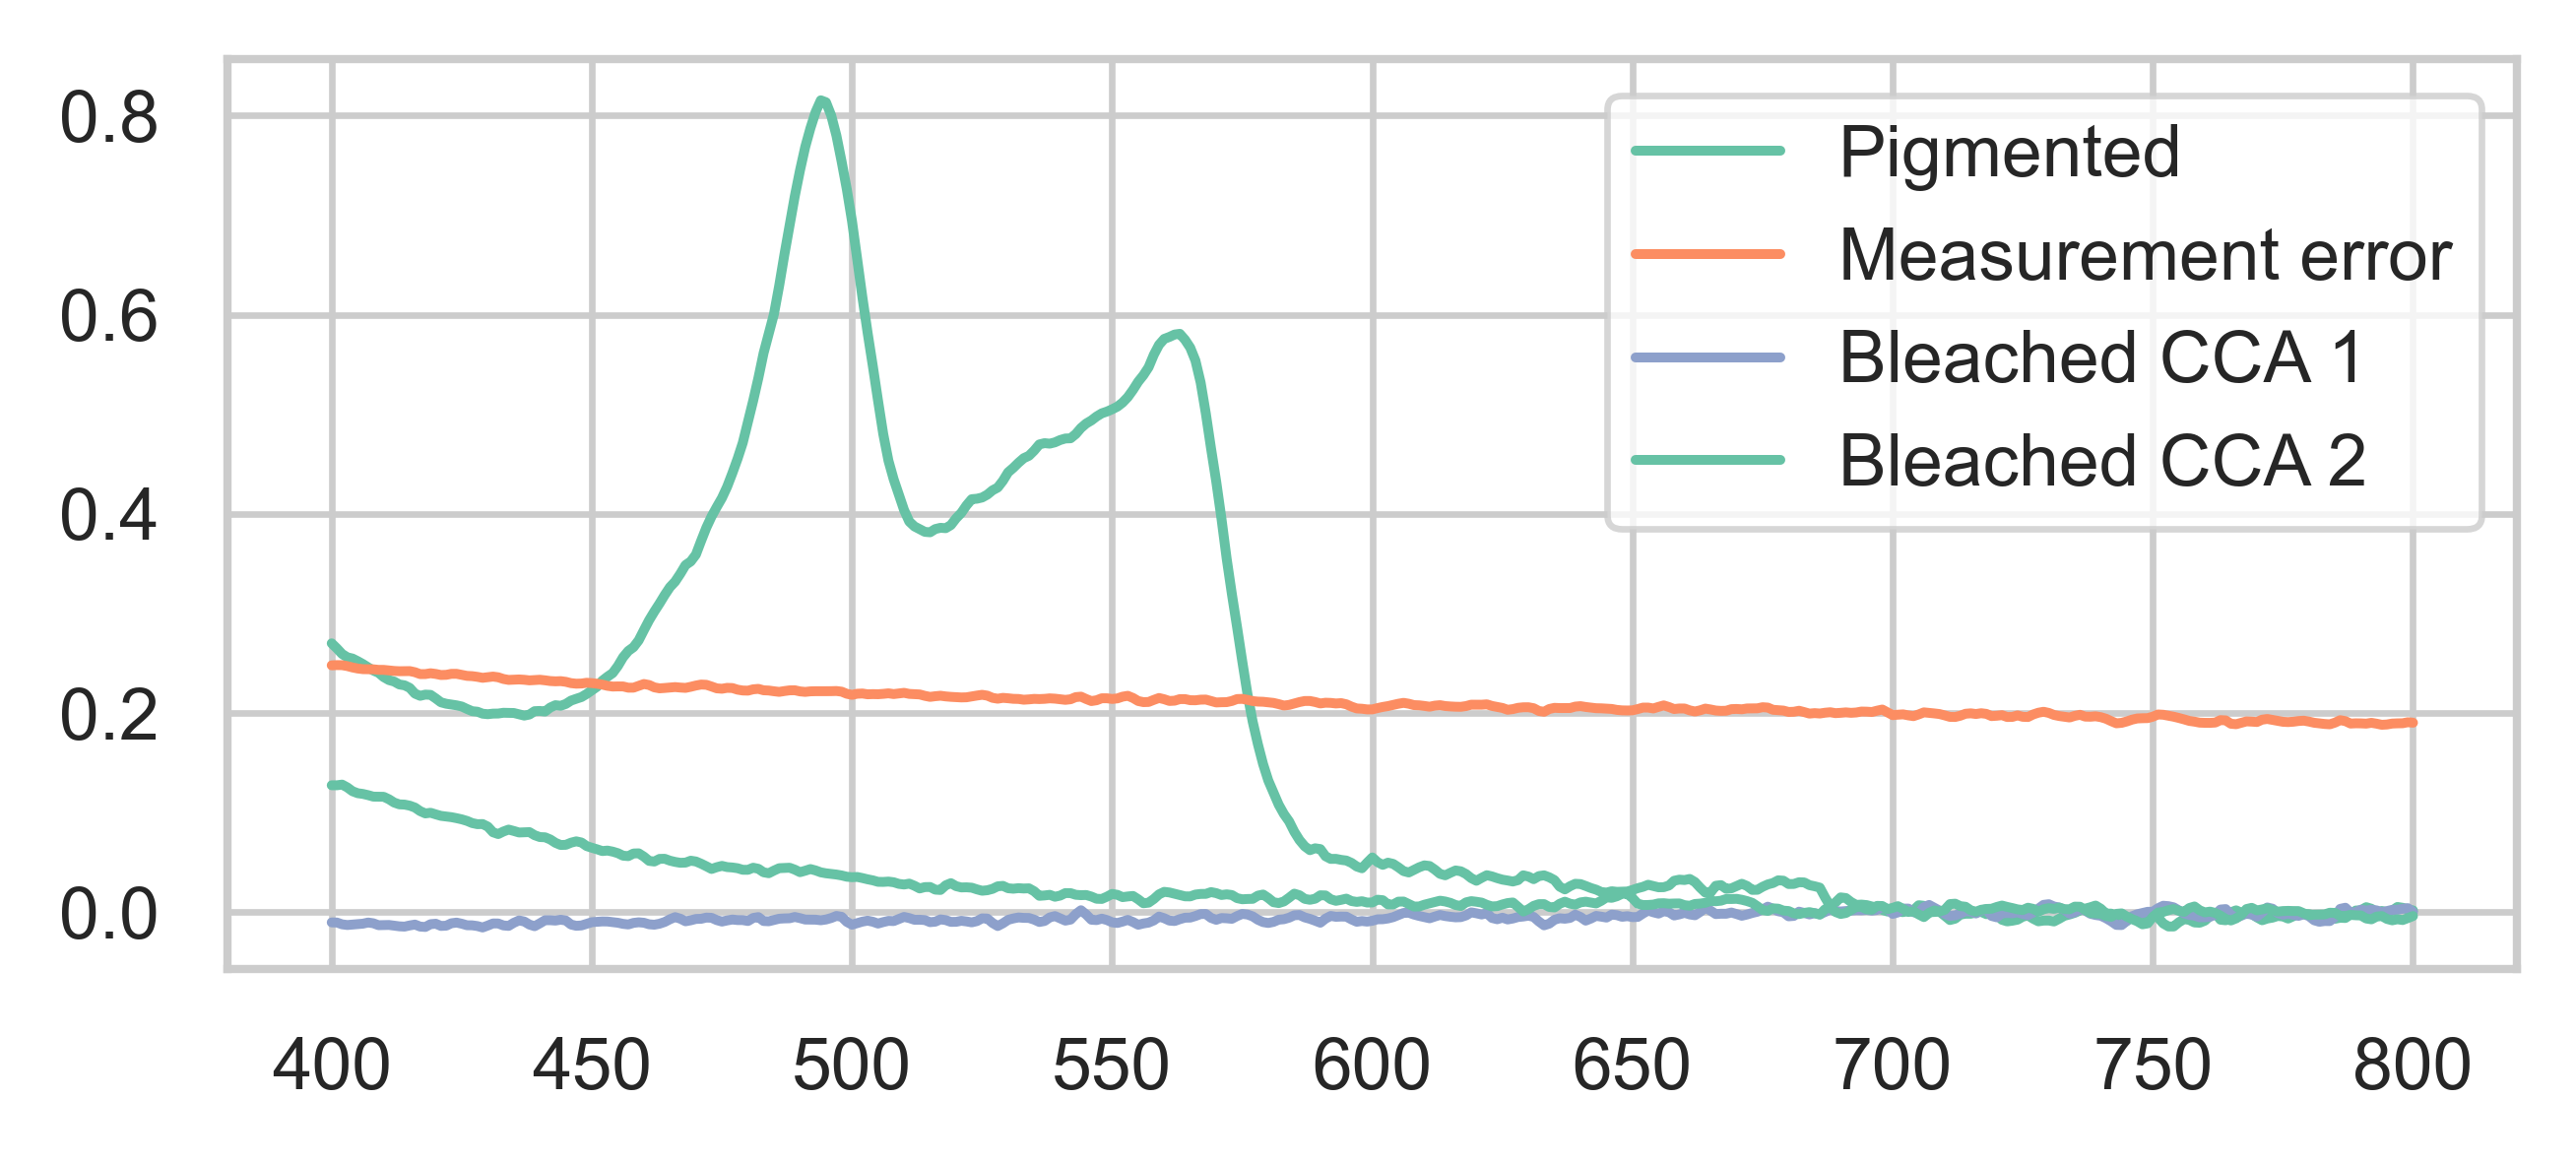

In [100]:
# Inspect some pigmented samples
plt.plot(df_bin[['GN04','GN05','GN06']].mean(axis=1), label='Pigmented')

# Inspect Bleached and an erroneous measurement
plt.plot(df_bin['CE01A'], label='Measurement error')
plt.plot(df_bin['CE01B'], label='Bleached CCA 1')
plt.plot(df_bin['CE03B'], label='Bleached CCA 2')
plt.legend()
plt.show()

In [101]:
# Seems that CE01A was an erroneous measurement, store mean of bleached only
cca_bleached = df_bin[['CE01B','CE03B']].mean(axis=1)
df_bin_d = df_bin.drop(labels=['CE01B','CE03B','CE01A'], axis=1)
col_names_d = ['CE02','CE03','CE04','GN02','GN03','GN04','GN05','GN06','GN07','GN08','GS03']

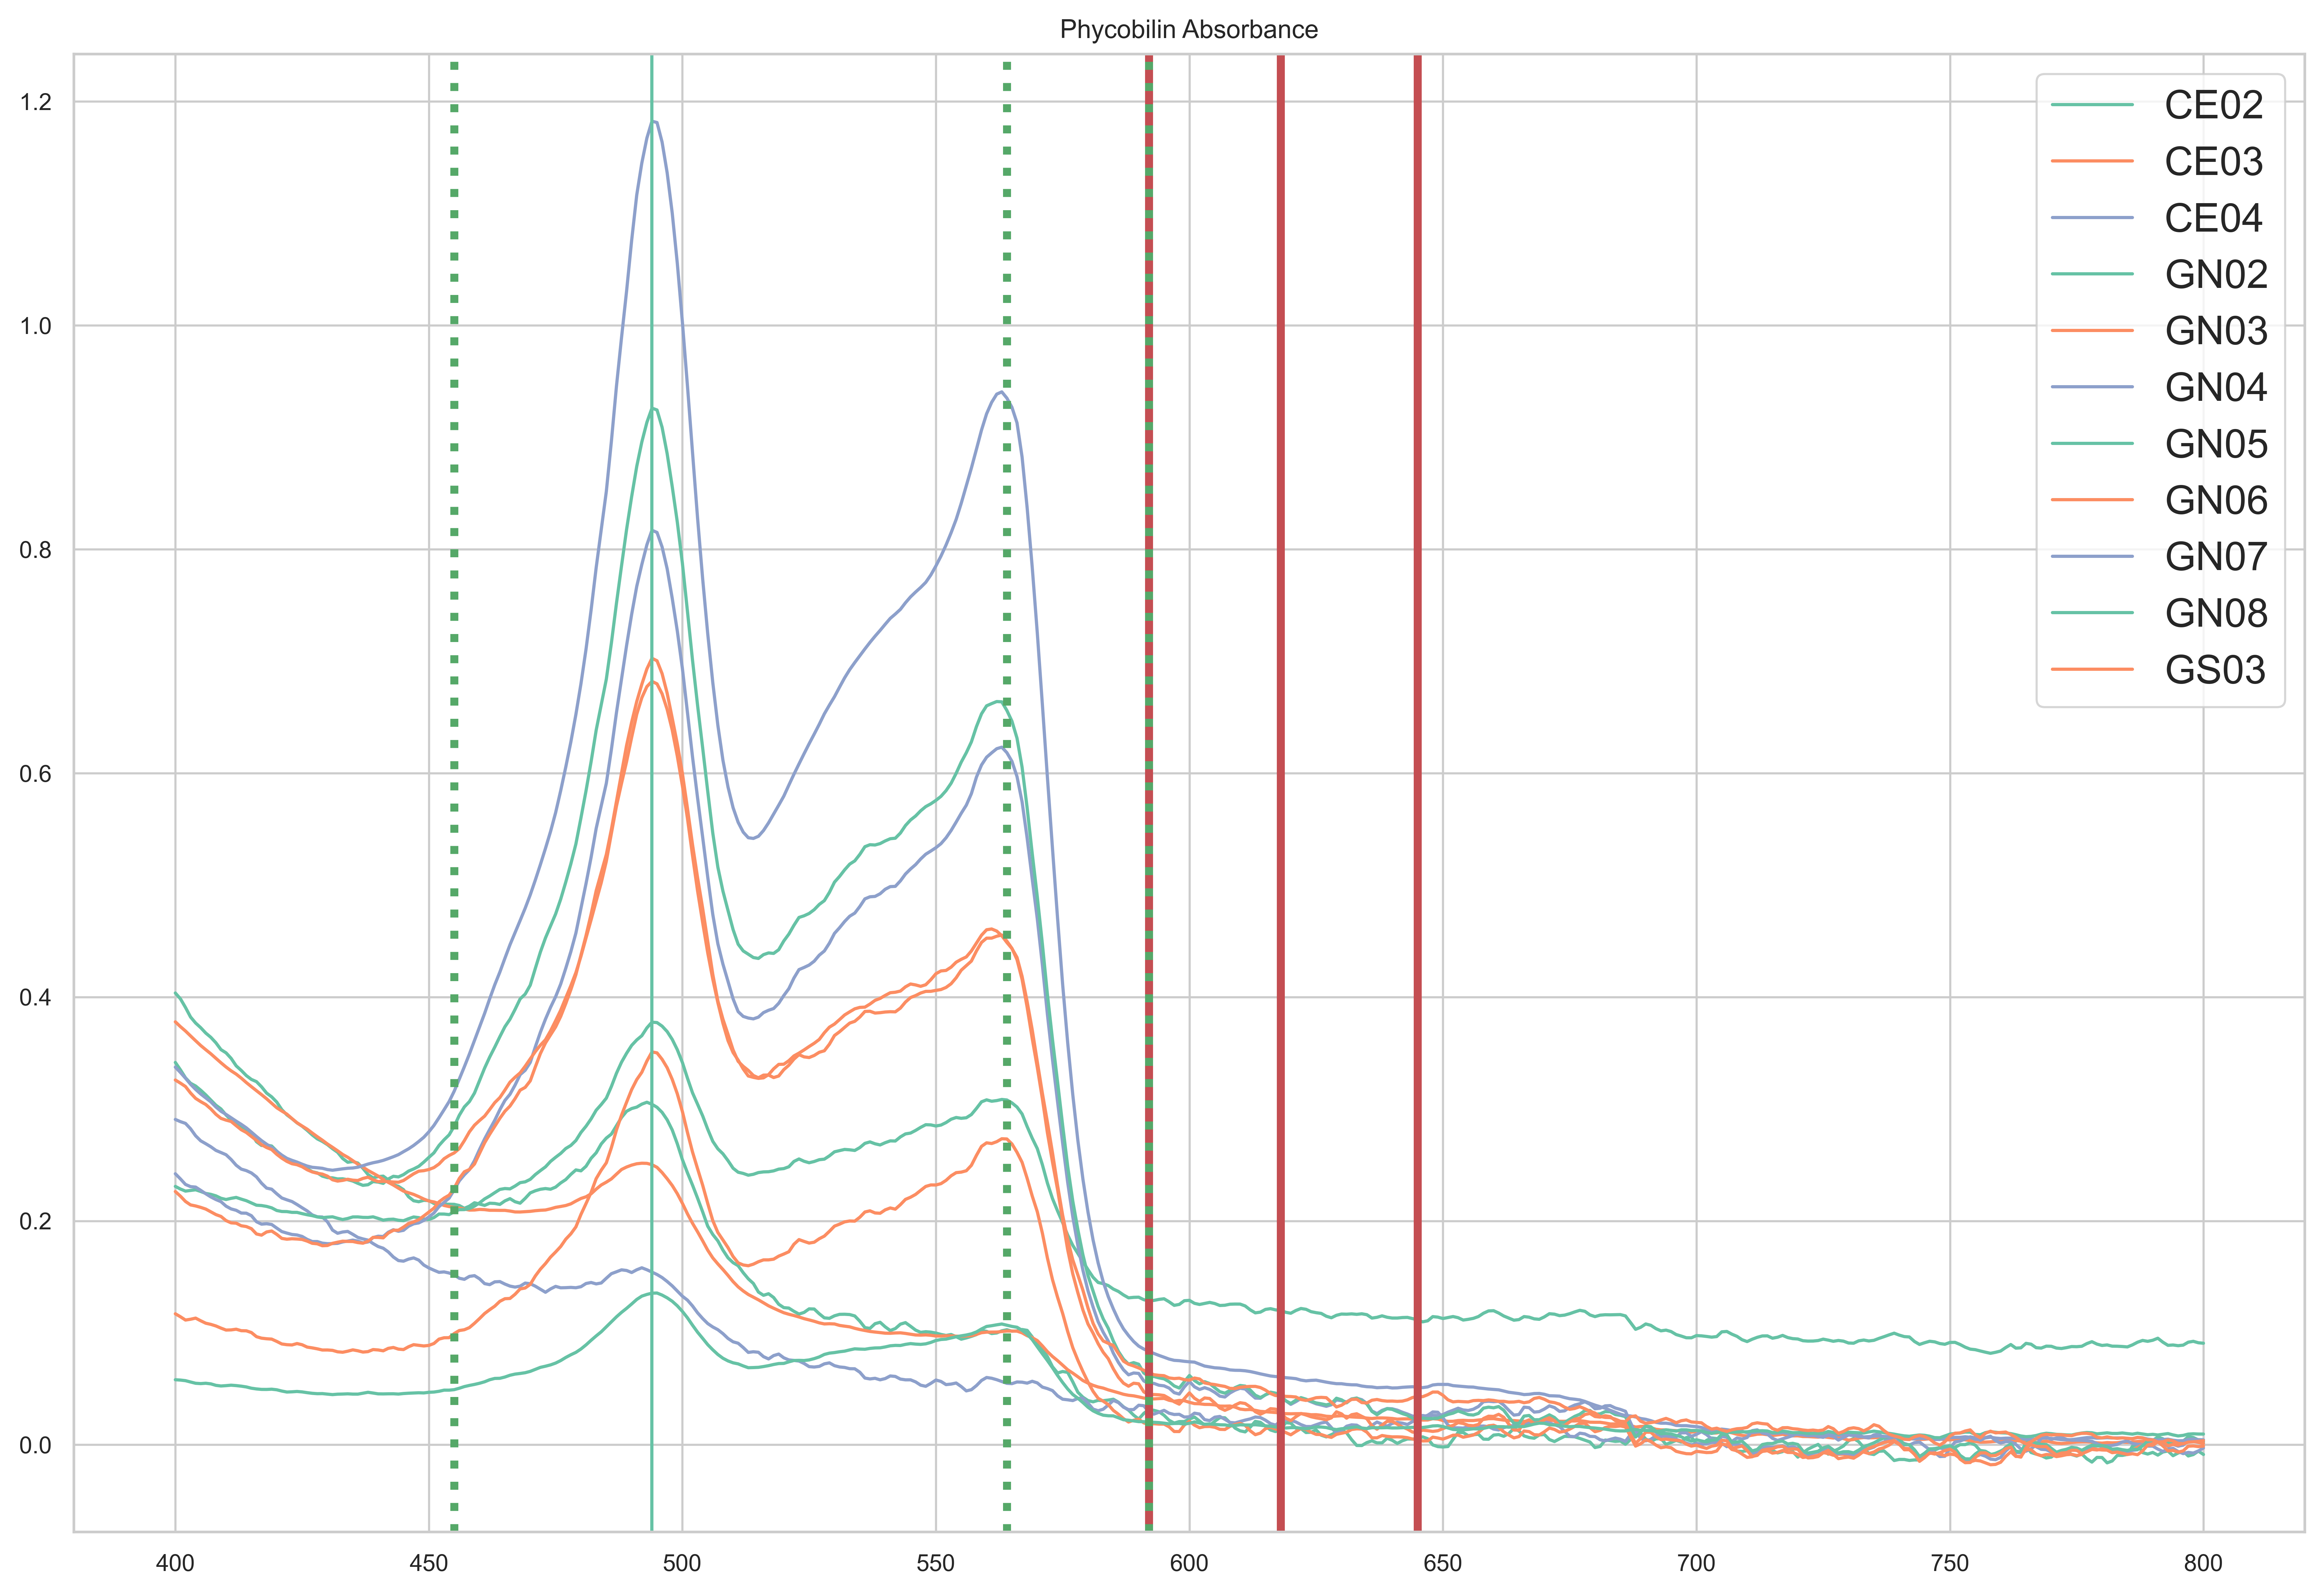

In [102]:
# Figure
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(df_bin_d, label=col_names_d)
plt.title('Phycobilin Absorbance')
plt.legend(fontsize=15)

plt.axvline(564,**kwargs) # Phycoerythrin
plt.axvline(455,**kwargs)
plt.axvline(618,**kwargs2) # Phycocyanin
plt.axvline(645,**kwargs2)
plt.axvline(592,**kwargs2)
plt.axvline(592,**kwargs)

plt.axvline(494)

plt.show()

In [103]:
# Phycoerythrin concentration (mg/ml)
a564 = df_bin.loc[df_bin.index == 564.0] # Get position
#a564 = a564['Absorbance [A]'].values # Get A values
a592 = df_bin.loc[df_bin.index == 592.0]
#a592 = a592['Absorbance [A]'].values
a455 = df_bin.loc[df_bin.index == 455.0]
#a455 = a455['Absorbance [A]'].values
# Applying PE formula
pe_conc = ((a564.values - a592.values) - (a455.values - a592.values) * 0.2) * 0.12
#print('Phycoerythrin (mg/ml)', pe_conc)

# Phycocyanin concentration (mg/ml)
a618 = df_bin.loc[df_bin.index == 618.0] # Get position
#a618 = a618['Absorbance [A]'].values # Get A values
a645 = df_bin.loc[df_bin.index == 645.0]
#a645 = a645['Absorbance [A]'].values
a592 = df_bin.loc[df_bin.index == 592.0]
#a592 = a592['Absorbance [A]'].values

# Applying PC formula
pc_conc = ((a618.values - a645.values) - (a592.values - a645.values) * 0.51) * 0.15
#print('Phycocyanin (mg/ml)', pc_conc)

# Kursar et al. formulas 
a494 = df_bin.loc[df_bin.index == 494.0] # Modified to the peak obtained in our measeruments from 498 to 494
#a494 = a494['Absorbance [A]'].values
a614 = df_bin.loc[df_bin.index == 614.0]
#a614 = a614['Absorbance [A]'].values
a651 = df_bin.loc[df_bin.index == 651.0]
#a651 = a651['Absorbance [A]'].values

# Apply Kursar et al. formulas
k_apc_conc = (181.3 * a651.values) - (22.3 * a614.values)
k_pc_conc = (151.1 * a614.values) - (99.1 * a651.values)
k_pe_conc = (155.8 * a494.values) - (40.0 * a614.values) - (10.5 * a651.values)

# Sampath-Wiley & Neefus (2006) - Formulas
a564 = a564 # Used in Paine equation
a618 = a618 # Used in Paine equation
a730 = df_bin.loc[df_bin.index == 730.0]
#a730 = a730['Absorbance [A]'].values

# Apply Sampath-Wiley & Neefus formulas
s_pc_conc = 0.154 * (a618.values - a730.values)
s_pe_conc = 0.1247* ((a564.values - a730.values) - 0.4583 * (a618.values - a730.values))

# Ismail & Osman 2016
a562 = df_bin.loc[df_bin.index == 562.0]
a615 = df_bin.loc[df_bin.index == 615.0]
a652 = df_bin.loc[df_bin.index == 652.0]

io_pc = ((a615.values) * (0.475 * a652.values)) / 5.34
io_apc = ((a652.values) - (0.208 * a615.values)) / 5.09
io_pe = ((a562.values) - (2.41 * io_pc) - (0.849 * io_apc)) / 9.62


# Build Dataframe
df_concentrations = pd.DataFrame({'PE':pe_conc[0], 'PC':pc_conc[0],
                                  'K_APC':k_apc_conc[0], 'K_PC':k_pc_conc[0],
                                  'K_PE':k_pe_conc[0], 'S_PC':s_pc_conc[0],
                                  'S_PE':s_pe_conc[0], 'IO_PC':io_pc[0], 'IO_APC':io_apc[0],
                                  'IO_PE':io_pe[0]
                                 })

In [104]:
df_concentrations

PE        PC      K_APC       K_PC        K_PE      S_PC      S_PE  \
0   0.000060 -0.000055  32.361438  11.064655   24.143856  0.001058  0.001337   
1  -0.000049  0.000198  -0.776963  -0.114557   -1.056065 -0.001736 -0.001048   
2   0.004148 -0.000719  -0.730408   3.188434   46.608816  0.001599  0.011784   
3   0.003146 -0.000575   3.133166   2.432481   37.575977  0.003742  0.010768   
4  -0.000759 -0.000606   1.318236   0.774676    5.715088  0.000894  0.001146   
5   0.000132 -0.000903   2.637792   1.941331   22.879648  0.001914  0.005045   
6   0.019624 -0.000023  17.968139   6.641886   52.887878  0.004492  0.025406   
7   0.028644  0.000230   0.984888   0.911324   54.193791  0.003500  0.033964   
8   0.063476  0.000417   4.358205   3.393676  125.317736  0.007876  0.075174   
9   0.066021  0.000158   3.979972   3.688768  142.312250  0.007626  0.079746   
10  0.044212  0.000057   2.301396   2.535689  108.211602  0.006080  0.055224   
11  0.096608 -0.001072   8.365172   4.229743  181.119622  0.007974  0.112534   
12  0.009669 -0.000409   2.340745   1.153273   20.245342  0.000630  0.011687   
13  0.041408 -0.001493   6.145325   3.745780  103.786666  0.004568  0.052463   

           IO_PC    IO_APC     IO_PE  
0   3.775423e-03  0.031920  0.018315  
1   5.511385e-07 -0.000077 -0.000914  
2   7.108313e-06  0.000267  0.010360  
3   5.516744e-05  0.002921  0.010199  
4   6.004793e-06  0.001032  0.001832  
5   2.974745e-05  0.002089  0.005853  
6   1.232619e-03  0.017566  0.030105  
7   1.094172e-05  0.001097  0.028047  
8   1.227641e-04  0.004234  0.064236  
9   1.121051e-04  0.003733  0.068662  
10  4.528612e-05  0.002197  0.047022  
11  2.933916e-04  0.007832  0.096801  
12  2.068605e-05  0.002002  0.010960  
13  1.667016e-04  0.005534  0.047175

#### Chlorophyll

In [105]:
# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Chlorophylls")
csv_list = list(files_path.glob('*.csv'))
csv_chl = csv_list

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


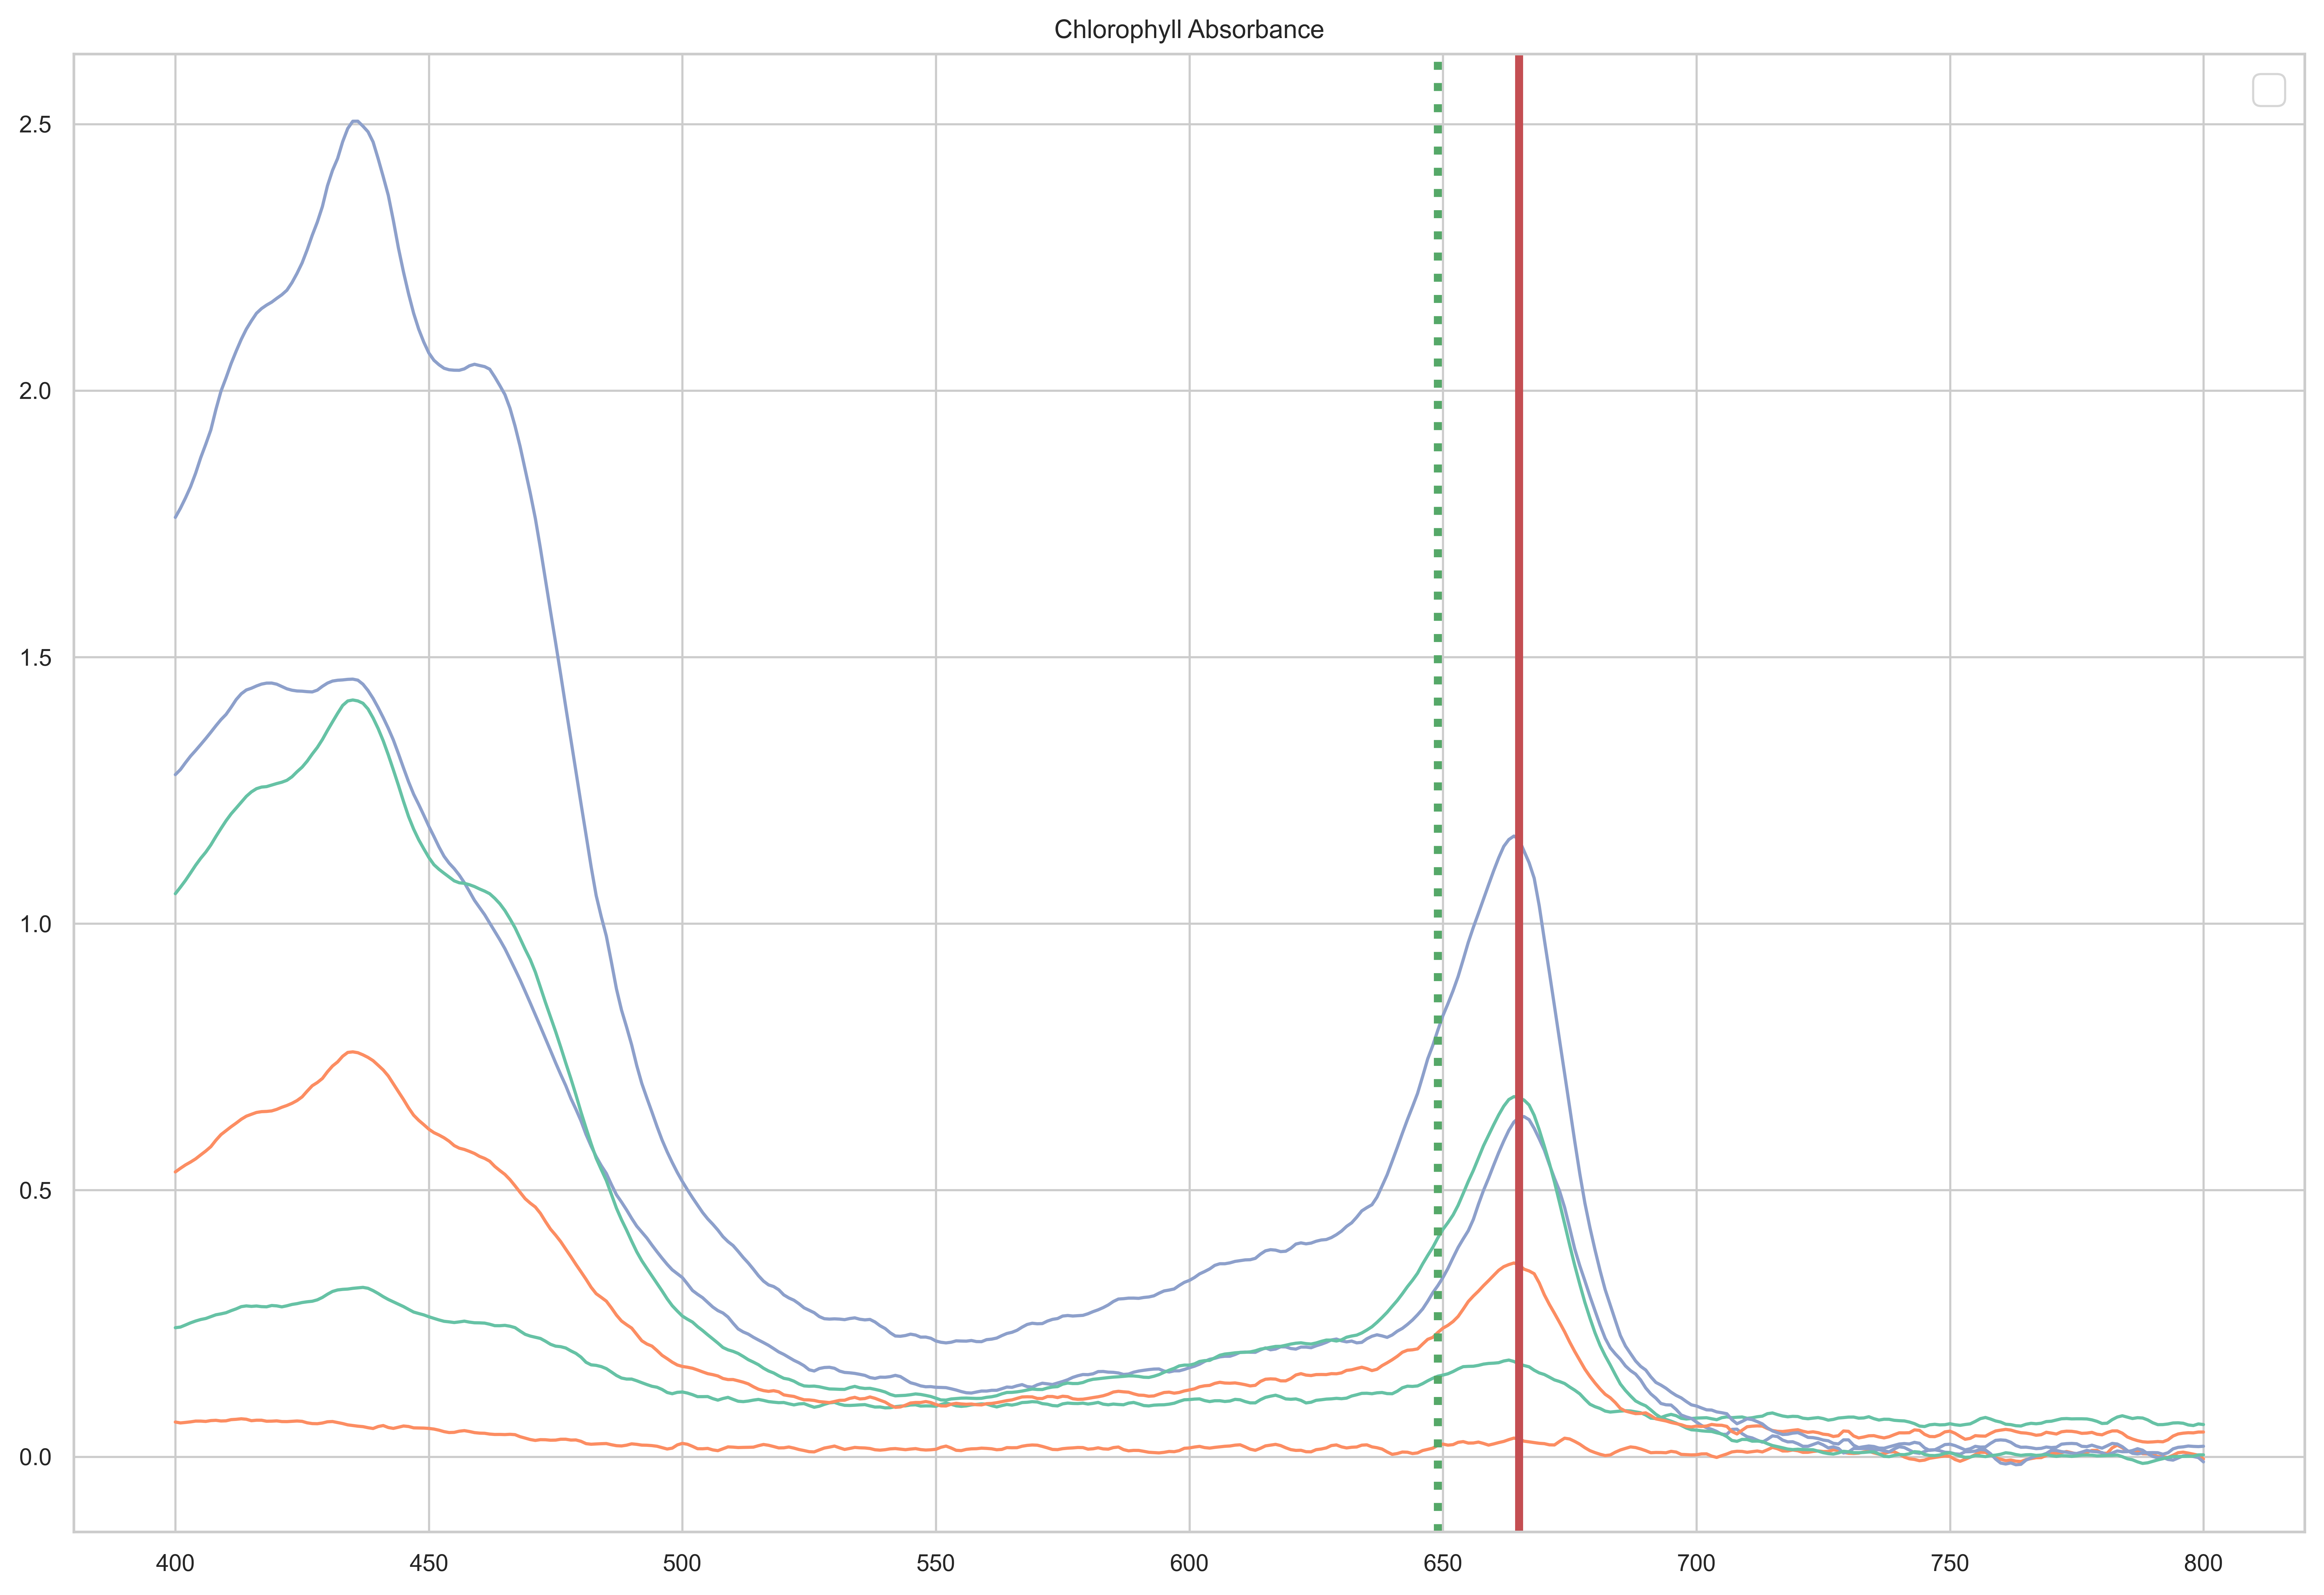

In [106]:
samples_id = []
samples = []

#Chlorophyll
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    # Now we know where Absorbance values start, note header arg
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    
    samples.append(df[label])
    samples_id.append(label)

samples_df = pd.concat(samples, axis=1, ignore_index=True)
#samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin.index.name = 'Wavelength [nm]'
df_bin = df_bin.loc[400:800] # Only 400 - 800 nm wavelengths

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(df_bin[['CE01A','CE01B','CE02','CE03','CE03B','CE04']]) # Cape Evans
#plt.plot(df_bin[['GN02','GN03','GN04','GN05','GN06','GN07','GN08']]) # Granite Harbour North
#plt.plot(df_bin['GS03']) # Granite Harbour South
#plt.plot(df_bin, label=col_names)
plt.title('Chlorophyll Absorbance')
plt.legend(fontsize=15)

plt.axvline(649,**kwargs) # Chlorophyll
plt.axvline(665,**kwargs2)

plt.show()

In [107]:
cca_chl_bleached = df_bin[['CE01B','CE03B']].mean(axis=1)
df_bin_d = df_bin.drop(labels=['CE01B','CE03B','CE01A'], axis=1)

cca_chl = df_bin_d.mean(axis=1)

CE_chl = df_bin_d[CE].mean(axis=1)
GN_chl = df_bin_d[GN].mean(axis=1)
GS_chl = df_bin_d[GS]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


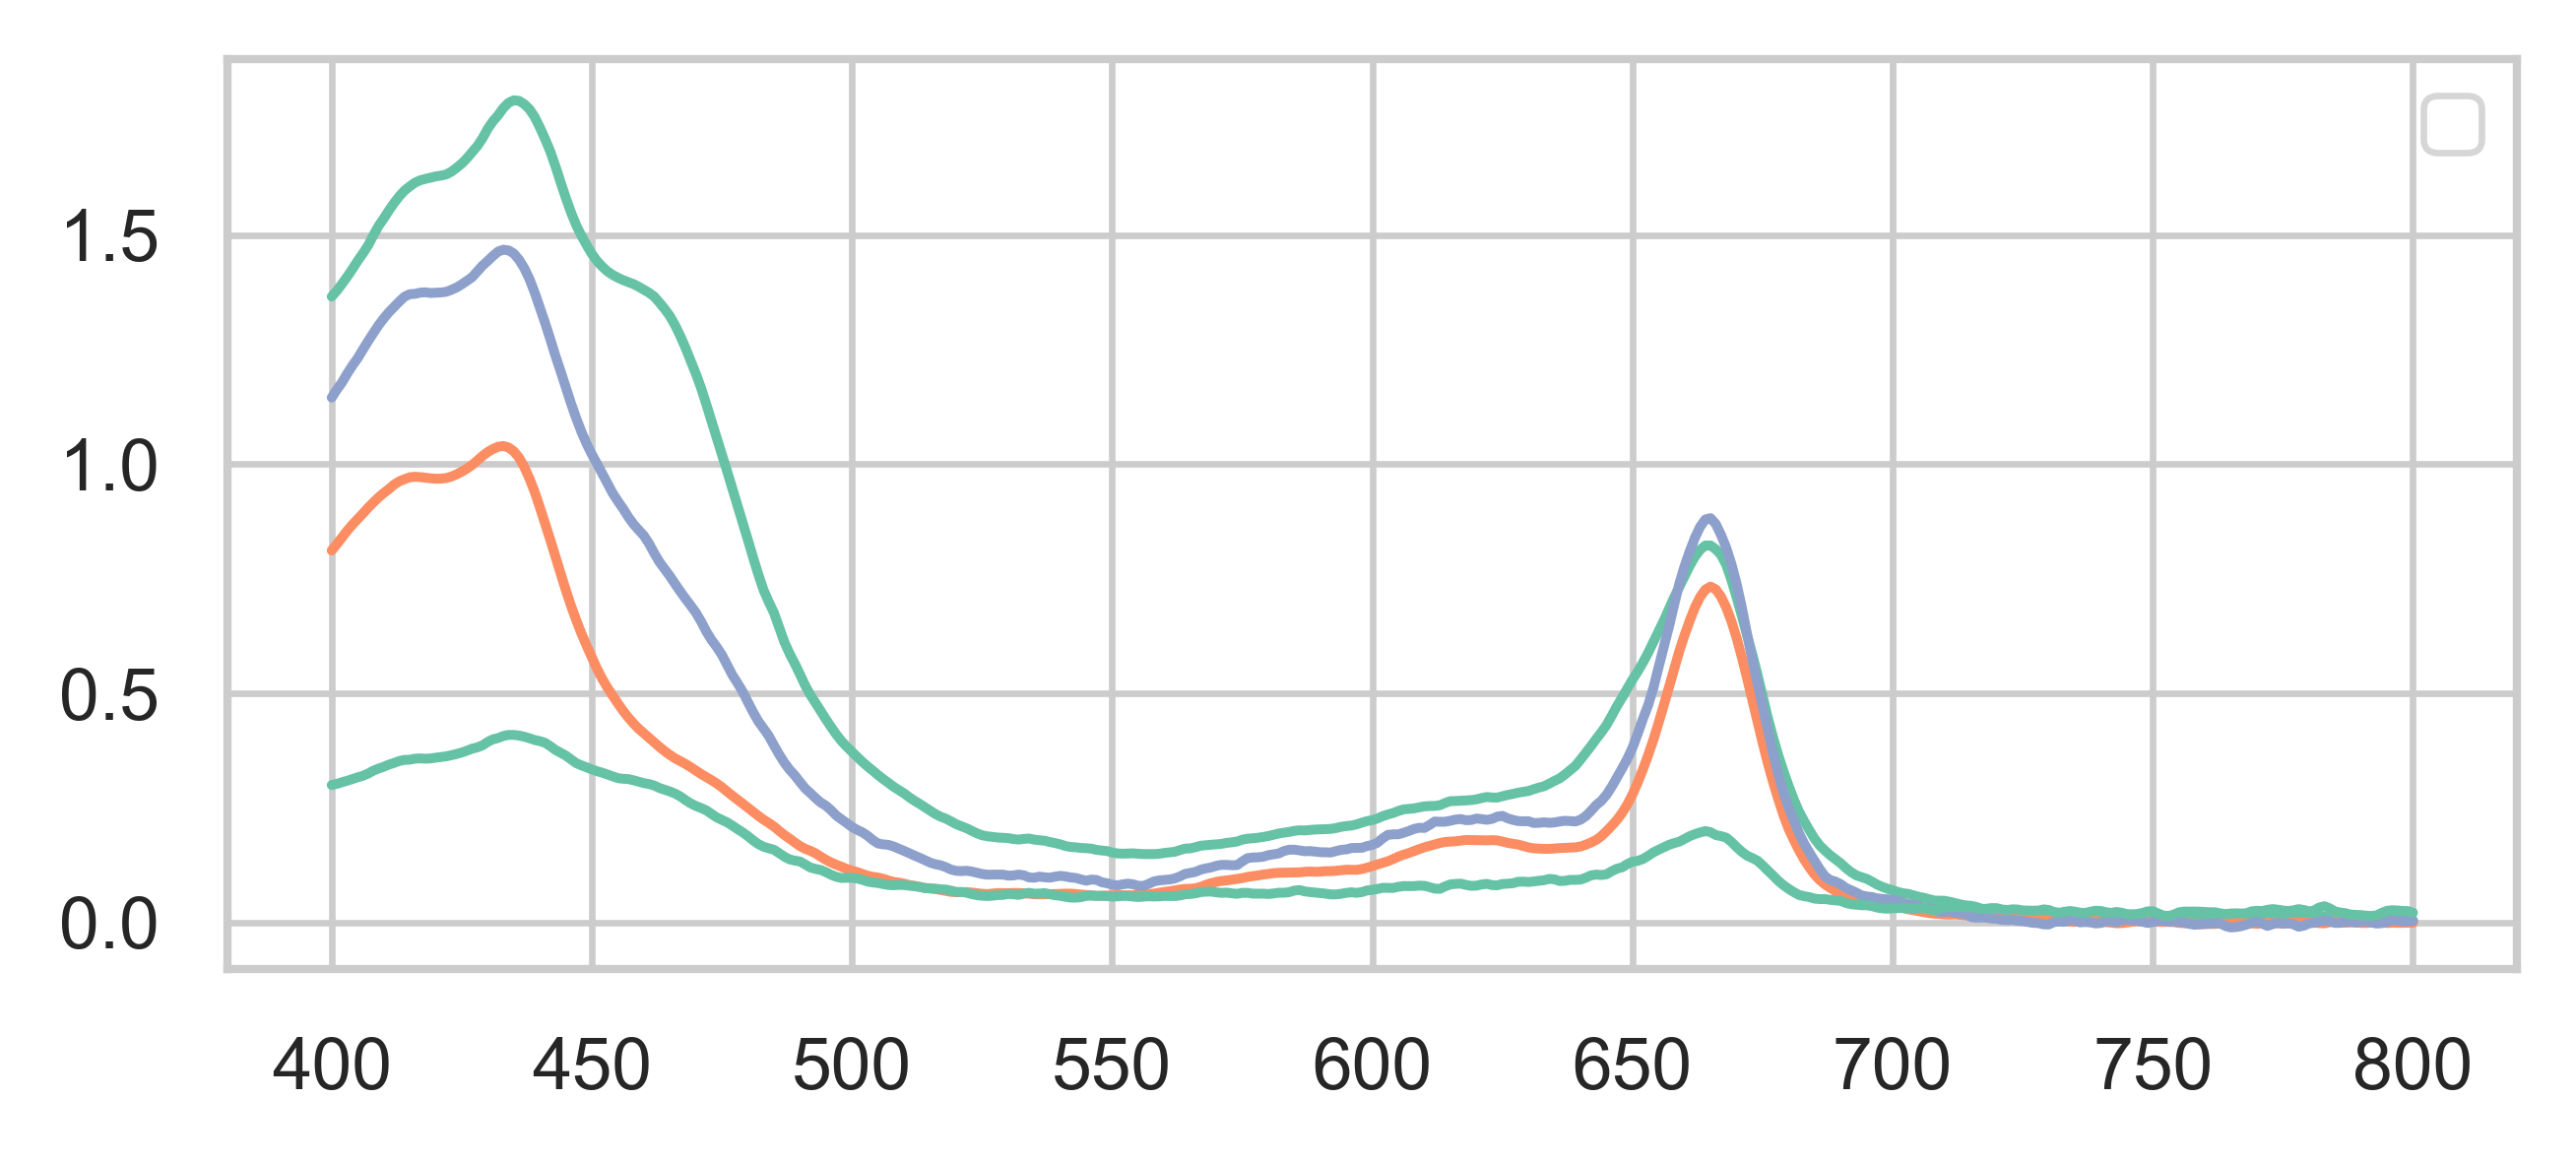

In [108]:
plt.plot(CE_chl)
plt.plot(GN_chl)
plt.plot(GS_chl)
#plt.fill_between(df_bin.index, phycob_pstd, phycob_nstd, color='C0', alpha=0.5)
plt.plot(cca_chl_bleached)
#plt.plot(cca_chl)
plt.legend()

In [109]:
# Chlorophyll concentration (mg)
a665 = df_bin.loc[df_bin.index == 665.0] # Get position
a649 = df_bin.loc[df_bin.index == 649.0]

# Applying formula
chl_conc = ((13.7 * a665.values)-(5.76 * a649.values))
#print('Chlorophyll (mg/ml)', pc_conc)
# Build Dataframe
df_concentrations['Chl'] = chl_conc[0]

df_concentrations.head()

PE        PC      K_APC       K_PC       K_PE      S_PC      S_PE  \
0  0.000060 -0.000055  32.361438  11.064655  24.143856  0.001058  0.001337   
1 -0.000049  0.000198  -0.776963  -0.114557  -1.056065 -0.001736 -0.001048   
2  0.004148 -0.000719  -0.730408   3.188434  46.608816  0.001599  0.011784   
3  0.003146 -0.000575   3.133166   2.432481  37.575977  0.003742  0.010768   
4 -0.000759 -0.000606   1.318236   0.774676   5.715088  0.000894  0.001146   

          IO_PC    IO_APC     IO_PE       Chl  
0  3.775423e-03  0.031920  0.018315  1.514997  
1  5.511385e-07 -0.000077 -0.000914  0.334363  
2  7.108313e-06  0.000267  0.010360  6.865503  
3  5.516744e-05  0.002921  0.010199  6.862322  
4  6.004793e-06  0.001032  0.001832  3.590715

## Pheophytin

In [110]:
# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Pheophytin")
csv_list = list(files_path.glob(r'*.csv'))
csv_pheo = csv_list # Used for plots

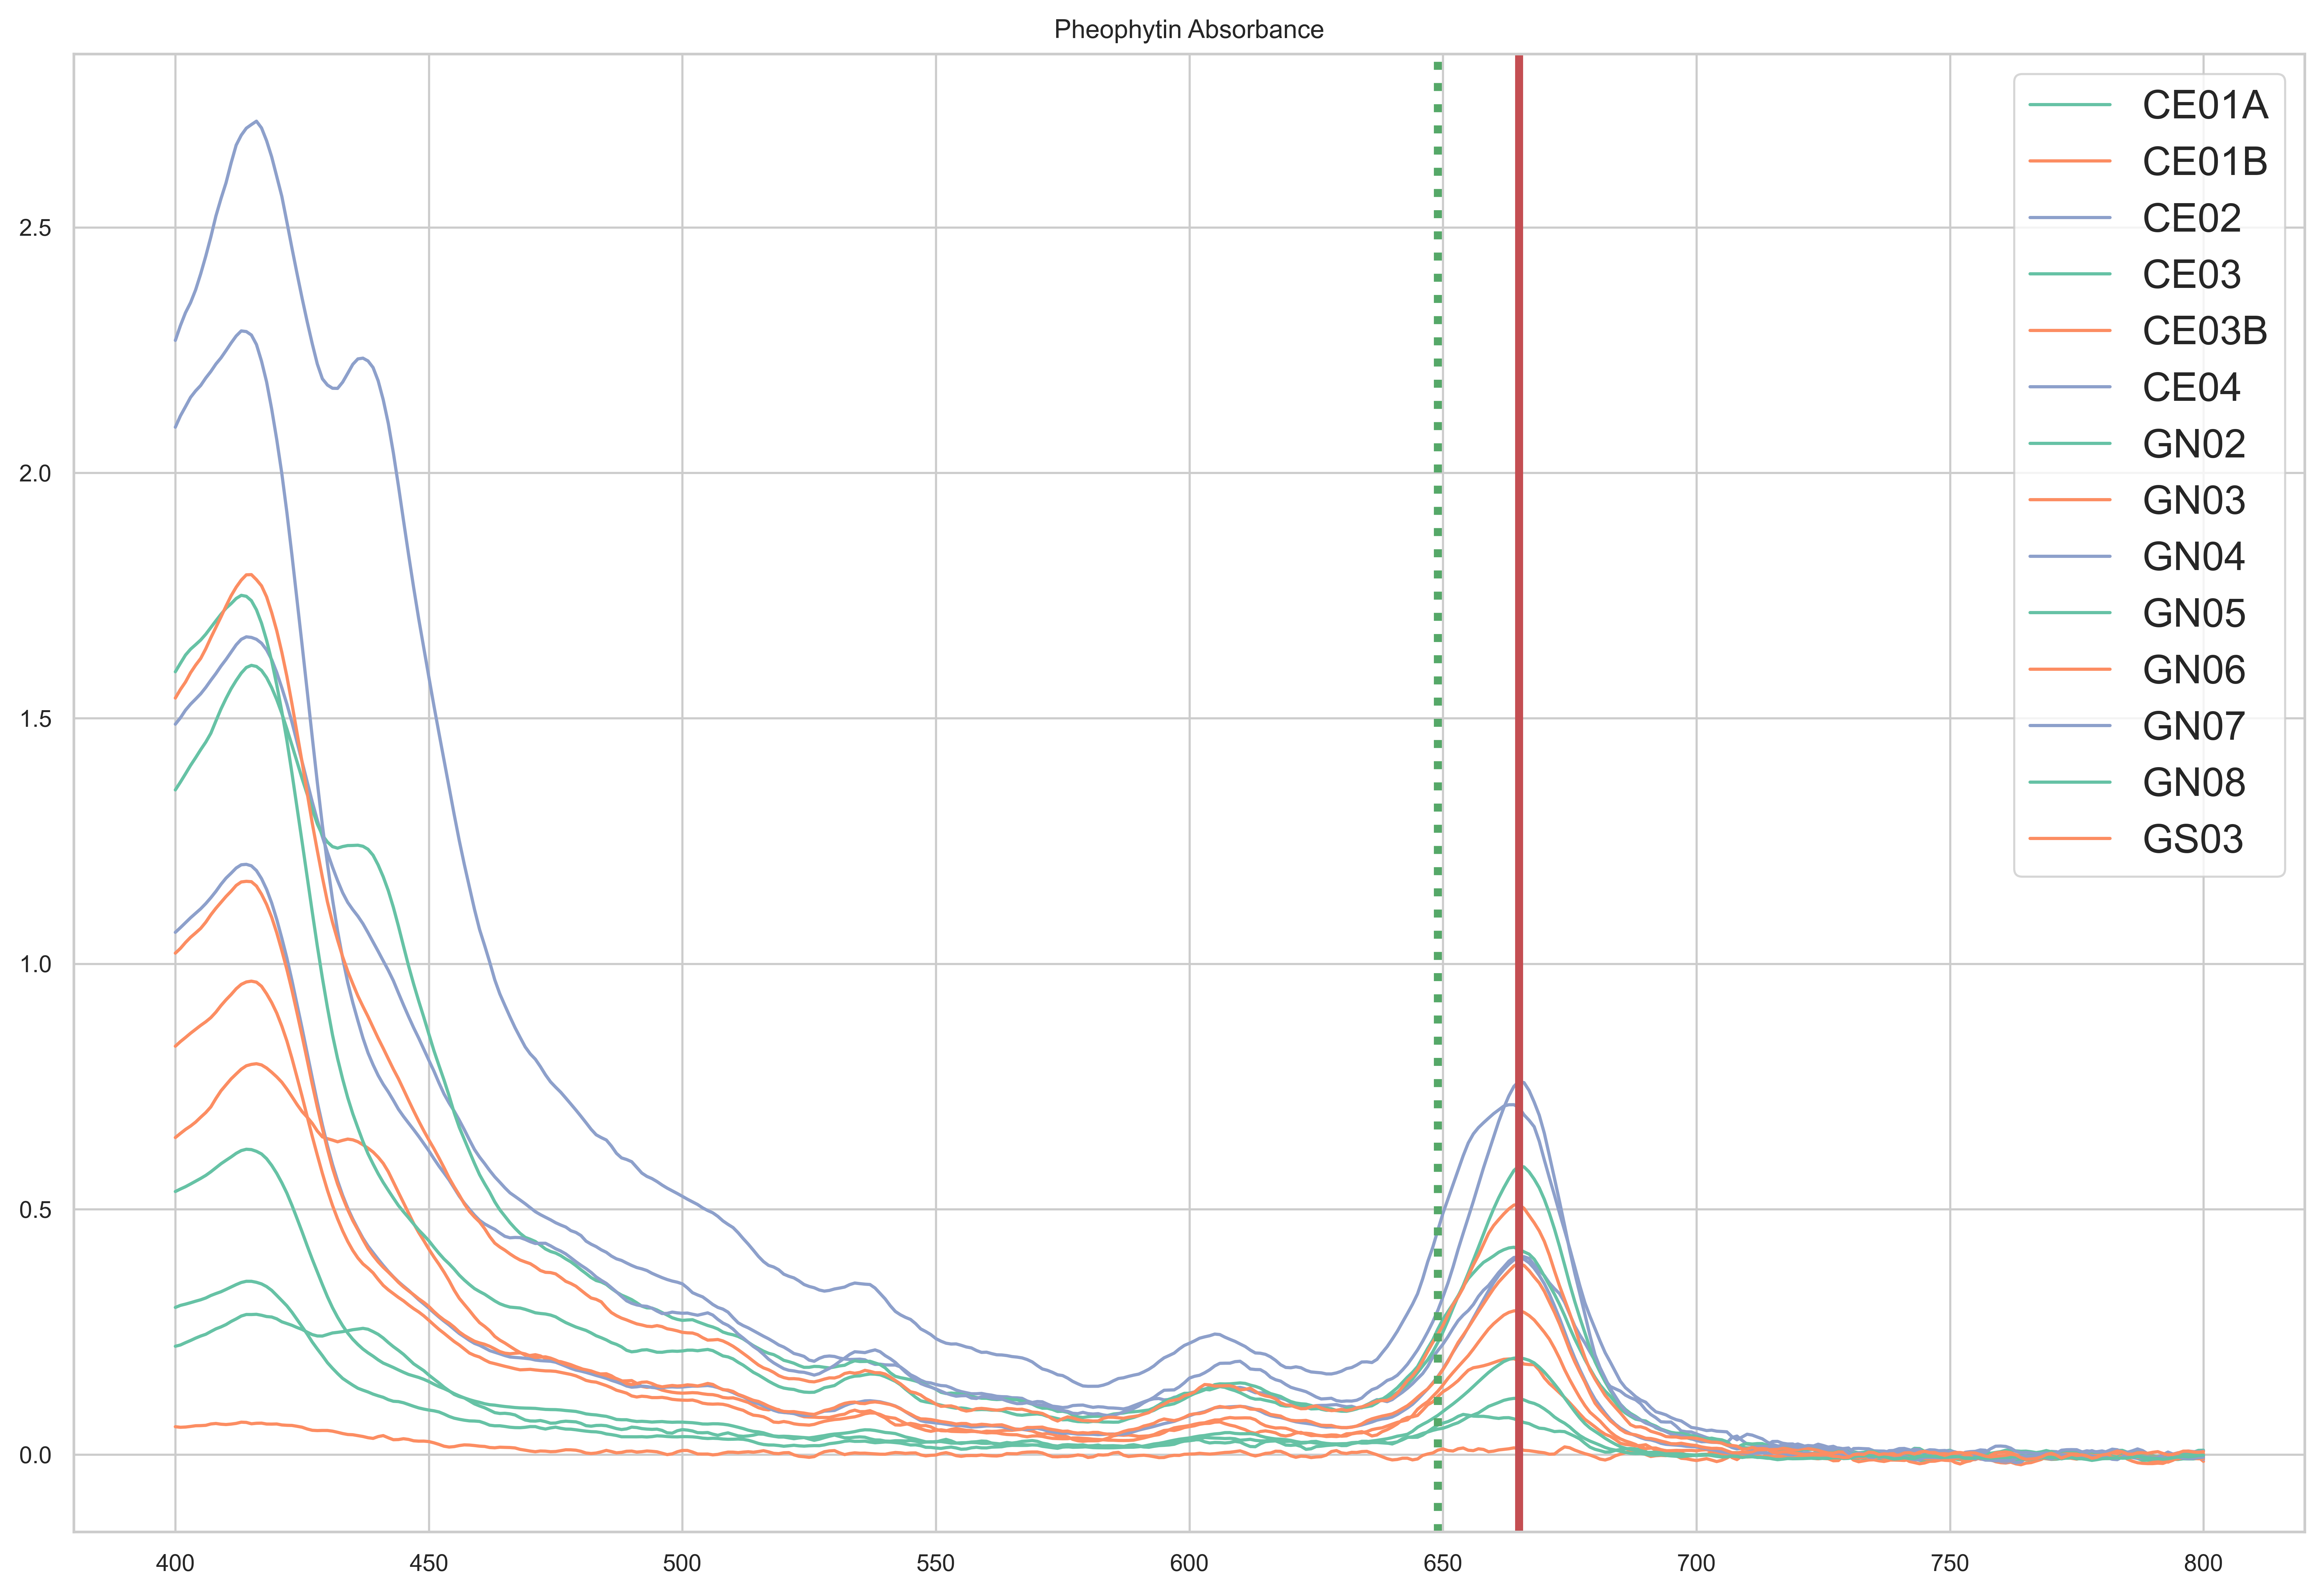

In [111]:
samples_id = []
samples = []

#Chlorophyll
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    # Now we know where Absorbance values start, note header arg
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    
    samples.append(df[label])
    samples_id.append(label)

samples_df = pd.concat(samples, axis=1, ignore_index=True)
#samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin.index.name = 'Wavelength [nm]'
df_bin = df_bin.loc[400:800] # Only 400 - 800 nm wavelengths

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(df_bin, label=col_names)
plt.title('Pheophytin Absorbance')
plt.legend(fontsize=15)

plt.axvline(649,**kwargs) # Chlorophyll
plt.axvline(665,**kwargs2)

plt.show()

In [112]:
cca_pheo_bleached = df_bin[['CE01B','CE03B']].mean(axis=1)
df_bin_d = df_bin.drop(labels=['CE01B','CE03B','CE01A'], axis=1)
cca_pheo = df_bin.mean(axis=1)

In [113]:
# Chlorophyll concentration (mg/ml)
a665 = df_bin.loc[df_bin.index == 665.0] # Get position
a649 = df_bin.loc[df_bin.index == 649.0]

# Applying formula - Same as chl
pheo_conc = ((13.7 * a665.values)-(5.76 * a649.values))
#print('Chlorophyll (mg/ml)', pc_conc)
# Build Dataframe
df_concentrations['Pheo'] = pheo_conc[0]

df_concentrations.head()

PE        PC      K_APC       K_PC       K_PE      S_PC      S_PE  \
0  0.000060 -0.000055  32.361438  11.064655  24.143856  0.001058  0.001337   
1 -0.000049  0.000198  -0.776963  -0.114557  -1.056065 -0.001736 -0.001048   
2  0.004148 -0.000719  -0.730408   3.188434  46.608816  0.001599  0.011784   
3  0.003146 -0.000575   3.133166   2.432481  37.575977  0.003742  0.010768   
4 -0.000759 -0.000606   1.318236   0.774676   5.715088  0.000894  0.001146   

          IO_PC    IO_APC     IO_PE       Chl      Pheo  
0  3.775423e-03  0.031920  0.018315  1.514997  0.605256  
1  5.511385e-07 -0.000077 -0.000914  0.334363  0.119528  
2  7.108313e-06  0.000267  0.010360  6.865503  4.293529  
3  5.516744e-05  0.002921  0.010199  6.862322  4.254229  
4  6.004793e-06  0.001032  0.001832  3.590715  1.945285

In [114]:
#Adjust Chlorophyll values
df_concentrations['Chl'] = df_concentrations['Chl'] - df_concentrations['Pheo']

## Prepare final dataframe

In [115]:
# Change values below 0 - This means Absorbance from that pigment was undetectable
df_concentrations[df_concentrations < 0] = 0

# Transpose
df_concentrations = df_concentrations.T

# Set column names
df_concentrations.columns = col_names

In [116]:
df_concentrations

CE01A         CE01B       CE02       CE03     CE03B       CE04  \
PE       0.000060  0.000000e+00   0.004148   0.003146  0.000000   0.000132   
PC       0.000000  1.983870e-04   0.000000   0.000000  0.000000   0.000000   
K_APC   32.361438  0.000000e+00   0.000000   3.133166  1.318236   2.637792   
K_PC    11.064655  0.000000e+00   3.188434   2.432481  0.774676   1.941331   
K_PE    24.143856  0.000000e+00  46.608816  37.575977  5.715088  22.879648   
S_PC     0.001058  0.000000e+00   0.001599   0.003742  0.000894   0.001914   
S_PE     0.001337  0.000000e+00   0.011784   0.010768  0.001146   0.005045   
IO_PC    0.003775  5.511385e-07   0.000007   0.000055  0.000006   0.000030   
IO_APC   0.031920  0.000000e+00   0.000267   0.002921  0.001032   0.002089   
IO_PE    0.018315  0.000000e+00   0.010360   0.010199  0.001832   0.005853   
Chl      0.909741  2.148354e-01   2.571975   2.608093  1.645430   4.204009   
Pheo     0.605256  1.195281e-01   4.293529   4.254229  1.945285   7.055485   

             GN02       GN03        GN04        GN05        GN06        GN07  \
PE       0.019624   0.028644    0.063476    0.066021    0.044212    0.096608   
PC       0.000000   0.000230    0.000417    0.000158    0.000057    0.000000   
K_APC   17.968139   0.984888    4.358205    3.979972    2.301396    8.365172   
K_PC     6.641886   0.911324    3.393676    3.688768    2.535689    4.229743   
K_PE    52.887878  54.193791  125.317736  142.312250  108.211602  181.119622   
S_PC     0.004492   0.003500    0.007876    0.007626    0.006080    0.007974   
S_PE     0.025406   0.033964    0.075174    0.079746    0.055224    0.112534   
IO_PC    0.001233   0.000011    0.000123    0.000112    0.000045    0.000293   
IO_APC   0.017566   0.001097    0.004234    0.003733    0.002197    0.007832   
IO_PE    0.030105   0.028047    0.064236    0.068662    0.047022    0.096801   
Chl      1.971409   2.877107    3.575339    4.929251    3.276427    7.178791   
Pheo     2.241980   3.278945    4.569875    6.738328    4.420832    8.722993   

             GN08        GS03  
PE       0.009669    0.041408  
PC       0.000000    0.000000  
K_APC    2.340745    6.145325  
K_PC     1.153273    3.745780  
K_PE    20.245342  103.786666  
S_PC     0.000630    0.004568  
S_PE     0.011687    0.052463  
IO_PC    0.000021    0.000167  
IO_APC   0.002002    0.005534  
IO_PE    0.010960    0.047175  
Chl      4.842560    4.458936  
Pheo     1.273587    5.572993

In [117]:
# Prepare weights
# weights = df_weights.groupby(np.arange(len(df_weights)) // 2).mean()
# weights = weights.T
# weights.columns = col_names


In [118]:
# Concat weighths [mg] & area [cm2]
df_samples = pd.concat([df_concentrations, df_area.T], axis=0)

In [119]:
df_samples

CE01A         CE01B       CE02       CE03     CE03B       CE04  \
PE          0.000060  0.000000e+00   0.004148   0.003146  0.000000   0.000132   
PC          0.000000  1.983870e-04   0.000000   0.000000  0.000000   0.000000   
K_APC      32.361438  0.000000e+00   0.000000   3.133166  1.318236   2.637792   
K_PC       11.064655  0.000000e+00   3.188434   2.432481  0.774676   1.941331   
K_PE       24.143856  0.000000e+00  46.608816  37.575977  5.715088  22.879648   
S_PC        0.001058  0.000000e+00   0.001599   0.003742  0.000894   0.001914   
S_PE        0.001337  0.000000e+00   0.011784   0.010768  0.001146   0.005045   
IO_PC       0.003775  5.511385e-07   0.000007   0.000055  0.000006   0.000030   
IO_APC      0.031920  0.000000e+00   0.000267   0.002921  0.001032   0.002089   
IO_PE       0.018315  0.000000e+00   0.010360   0.010199  0.001832   0.005853   
Chl         0.909741  2.148354e-01   2.571975   2.608093  1.645430   4.204009   
Pheo        0.605256  1.195281e-01   4.293529   4.254229  1.945285   7.055485   
Area (m2)   0.000198  2.420000e-04   0.000697   0.000531  0.000337   0.000260   

                GN02       GN03        GN04        GN05        GN06  \
PE          0.019624   0.028644    0.063476    0.066021    0.044212   
PC          0.000000   0.000230    0.000417    0.000158    0.000057   
K_APC      17.968139   0.984888    4.358205    3.979972    2.301396   
K_PC        6.641886   0.911324    3.393676    3.688768    2.535689   
K_PE       52.887878  54.193791  125.317736  142.312250  108.211602   
S_PC        0.004492   0.003500    0.007876    0.007626    0.006080   
S_PE        0.025406   0.033964    0.075174    0.079746    0.055224   
IO_PC       0.001233   0.000011    0.000123    0.000112    0.000045   
IO_APC      0.017566   0.001097    0.004234    0.003733    0.002197   
IO_PE       0.030105   0.028047    0.064236    0.068662    0.047022   
Chl         1.971409   2.877107    3.575339    4.929251    3.276427   
Pheo        2.241980   3.278945    4.569875    6.738328    4.420832   
Area (m2)   0.001020   0.001889    0.001884    0.002026    0.001485   

                 GN07       GN08        GS03  
PE           0.096608   0.009669    0.041408  
PC           0.000000   0.000000    0.000000  
K_APC        8.365172   2.340745    6.145325  
K_PC         4.229743   1.153273    3.745780  
K_PE       181.119622  20.245342  103.786666  
S_PC         0.007974   0.000630    0.004568  
S_PE         0.112534   0.011687    0.052463  
IO_PC        0.000293   0.000021    0.000167  
IO_APC       0.007832   0.002002    0.005534  
IO_PE        0.096801   0.010960    0.047175  
Chl          7.178791   4.842560    4.458936  
Pheo         8.722993   1.273587    5.572993  
Area (m2)    0.002375   0.000630    0.001638

In [120]:
df_samples = df_samples.T
df_samples

PE        PC      K_APC       K_PC        K_PE      S_PC  \
CE01A  0.000060  0.000000  32.361438  11.064655   24.143856  0.001058   
CE01B  0.000000  0.000198   0.000000   0.000000    0.000000  0.000000   
CE02   0.004148  0.000000   0.000000   3.188434   46.608816  0.001599   
CE03   0.003146  0.000000   3.133166   2.432481   37.575977  0.003742   
CE03B  0.000000  0.000000   1.318236   0.774676    5.715088  0.000894   
CE04   0.000132  0.000000   2.637792   1.941331   22.879648  0.001914   
GN02   0.019624  0.000000  17.968139   6.641886   52.887878  0.004492   
GN03   0.028644  0.000230   0.984888   0.911324   54.193791  0.003500   
GN04   0.063476  0.000417   4.358205   3.393676  125.317736  0.007876   
GN05   0.066021  0.000158   3.979972   3.688768  142.312250  0.007626   
GN06   0.044212  0.000057   2.301396   2.535689  108.211602  0.006080   
GN07   0.096608  0.000000   8.365172   4.229743  181.119622  0.007974   
GN08   0.009669  0.000000   2.340745   1.153273   20.245342  0.000630   
GS03   0.041408  0.000000   6.145325   3.745780  103.786666  0.004568   

           S_PE         IO_PC    IO_APC     IO_PE       Chl      Pheo  \
CE01A  0.001337  3.775423e-03  0.031920  0.018315  0.909741  0.605256   
CE01B  0.000000  5.511385e-07  0.000000  0.000000  0.214835  0.119528   
CE02   0.011784  7.108313e-06  0.000267  0.010360  2.571975  4.293529   
CE03   0.010768  5.516744e-05  0.002921  0.010199  2.608093  4.254229   
CE03B  0.001146  6.004793e-06  0.001032  0.001832  1.645430  1.945285   
CE04   0.005045  2.974745e-05  0.002089  0.005853  4.204009  7.055485   
GN02   0.025406  1.232619e-03  0.017566  0.030105  1.971409  2.241980   
GN03   0.033964  1.094172e-05  0.001097  0.028047  2.877107  3.278945   
GN04   0.075174  1.227641e-04  0.004234  0.064236  3.575339  4.569875   
GN05   0.079746  1.121051e-04  0.003733  0.068662  4.929251  6.738328   
GN06   0.055224  4.528612e-05  0.002197  0.047022  3.276427  4.420832   
GN07   0.112534  2.933916e-04  0.007832  0.096801  7.178791  8.722993   
GN08   0.011687  2.068605e-05  0.002002  0.010960  4.842560  1.273587   
GS03   0.052463  1.667016e-04  0.005534  0.047175  4.458936  5.572993   

       Area (m2)  
CE01A   0.000198  
CE01B   0.000242  
CE02    0.000697  
CE03    0.000531  
CE03B   0.000337  
CE04    0.000260  
GN02    0.001020  
GN03    0.001889  
GN04    0.001884  
GN05    0.002026  
GN06    0.001485  
GN07    0.002375  
GN08    0.000630  
GS03    0.001638

In [121]:
# Divide by weight
# df_samples['PE_mg'] = (df_samples['PE'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['PC_mg'] = (df_samples['PC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['Chl_mg'] = (df_samples['Chl'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['Pheo_mg'] = (df_samples['Pheo'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['K_APC_mg'] = (df_samples['K_APC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['K_PC_mg'] = (df_samples['K_PC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['K_PE_mg'] = (df_samples['K_PE'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['S_PC_mg'] = (df_samples['S_PC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['S_PE_mg'] = (df_samples['S_PE'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['IO_PC_mg'] = (df_samples['IO_PC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['IO_APC_mg'] = (df_samples['IO_APC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['IO_PE_mg'] = (df_samples['IO_PE'].values) / (df_samples['Weight (gr)'].values * 1000)

In [122]:
# Concentrations are in [mg/ml] so multiply by volume [ml], then divide by area [mm] = [mg/mm2] = Pigment by area
df_samples['PE_area'] = ((df_samples['PE'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['PC_area'] = ((df_samples['PC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['Chl_area'] = ((df_samples['Chl'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['Pheo_area'] = ((df_samples['Pheo'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['K_APC_area'] = ((df_samples['K_APC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['K_PC_area'] = ((df_samples['K_PC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['K_PE_area'] = ((df_samples['K_PE'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['S_PC_area'] = ((df_samples['S_PC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['S_PE_area'] = ((df_samples['S_PE'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['IO_PC_area'] = ((df_samples['IO_PC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['IO_APC_area'] = ((df_samples['IO_APC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['IO_PE_area'] = ((df_samples['IO_PE'].values) * 3) / (df_samples['Area (m2)'].values * 1000)

In [123]:
df_samples['Chl_area']

CE01A    13.783949
CE01B     2.663248
CE02     11.070192
CE03     14.734987
CE03B    14.647744
CE04     48.507791
GN02      5.798262
GN03      4.569254
GN04      5.693215
GN05      7.298990
GN06      6.619045
GN07      9.067947
GN08     23.059809
GS03      8.166550
Name: Chl_area, dtype: float64

In [124]:
# Inspect the data we are using
print(df_samples['PE_area'][0])
print(type(df_samples['PE_area'][1]))

0.000909454545454496
<class 'numpy.float64'>


## Export CSV - Pigment [mg/mm2]

In [131]:
# df_export = df_samples.filter(['PE_area', 'PC_area', 'Chl_area','Pheo_area',
#                                'K_APC_area','K_PC_area','K_PE_area',
#                               'S_PC_area','S_PE_area', 'IO_PC_area',
#                               'IO_APC_area', 'IO_PE_area'], axis=1)

# Removed Kursar and Pheophytin
df_export = df_samples.filter(['PE_area', 'PC_area', 'Chl_area',
                              'S_PC_area','S_PE_area', 'IO_PC_area',
                              'IO_APC_area', 'IO_PE_area'], axis=1)

# df_export = df_samples.filter(['PE_area', 'PC_area', 'Chl_area','Pheo_area'], axis=1)

df_export = df_export.T

In [132]:
df_export

CE01A     CE01B       CE02       CE03      CE03B       CE04  \
PE_area       0.000909  0.000000   0.017853   0.017771   0.000000   0.001520   
PC_area       0.000000  0.002459   0.000000   0.000000   0.000000   0.000000   
Chl_area     13.783949  2.663248  11.070192  14.734987  14.647744  48.507791   
S_PC_area     0.016037  0.000000   0.006882   0.021141   0.007961   0.022082   
S_PE_area     0.020251  0.000000   0.050721   0.060838   0.010205   0.058210   
IO_PC_area    0.057203  0.000007   0.000031   0.000312   0.000053   0.000343   
IO_APC_area   0.483631  0.000000   0.001151   0.016502   0.009188   0.024106   
IO_PE_area    0.277494  0.000000   0.044593   0.057622   0.016307   0.067537   

                 GN02      GN03      GN04      GN05      GN06      GN07  \
PE_area      0.057717  0.045491  0.101076  0.097760  0.089318  0.122032   
PC_area      0.000000  0.000366  0.000665  0.000233  0.000115  0.000000   
Chl_area     5.798262  4.569254  5.693215  7.298990  6.619045  9.067947   
S_PC_area    0.013213  0.005559  0.012542  0.011292  0.012283  0.010073   
S_PE_area    0.074723  0.053939  0.119704  0.118084  0.111563  0.142148   
IO_PC_area   0.003625  0.000017  0.000195  0.000166  0.000091  0.000371   
IO_APC_area  0.051665  0.001742  0.006743  0.005528  0.004438  0.009893   
IO_PE_area   0.088544  0.044543  0.102286  0.101671  0.094994  0.122275   

                  GN08      GS03  
PE_area       0.046043  0.075838  
PC_area       0.000000  0.000000  
Chl_area     23.059809  8.166550  
S_PC_area     0.003001  0.008366  
S_PE_area     0.055653  0.096086  
IO_PC_area    0.000099  0.000305  
IO_APC_area   0.009533  0.010136  
IO_PE_area    0.052191  0.086401

In [133]:
# Export pigment concentrations
df_export.to_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\pigment-mg-mm.csv", float_format='%f')

## Plots
### Plot by pigment type

In [70]:
out_p = r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry"

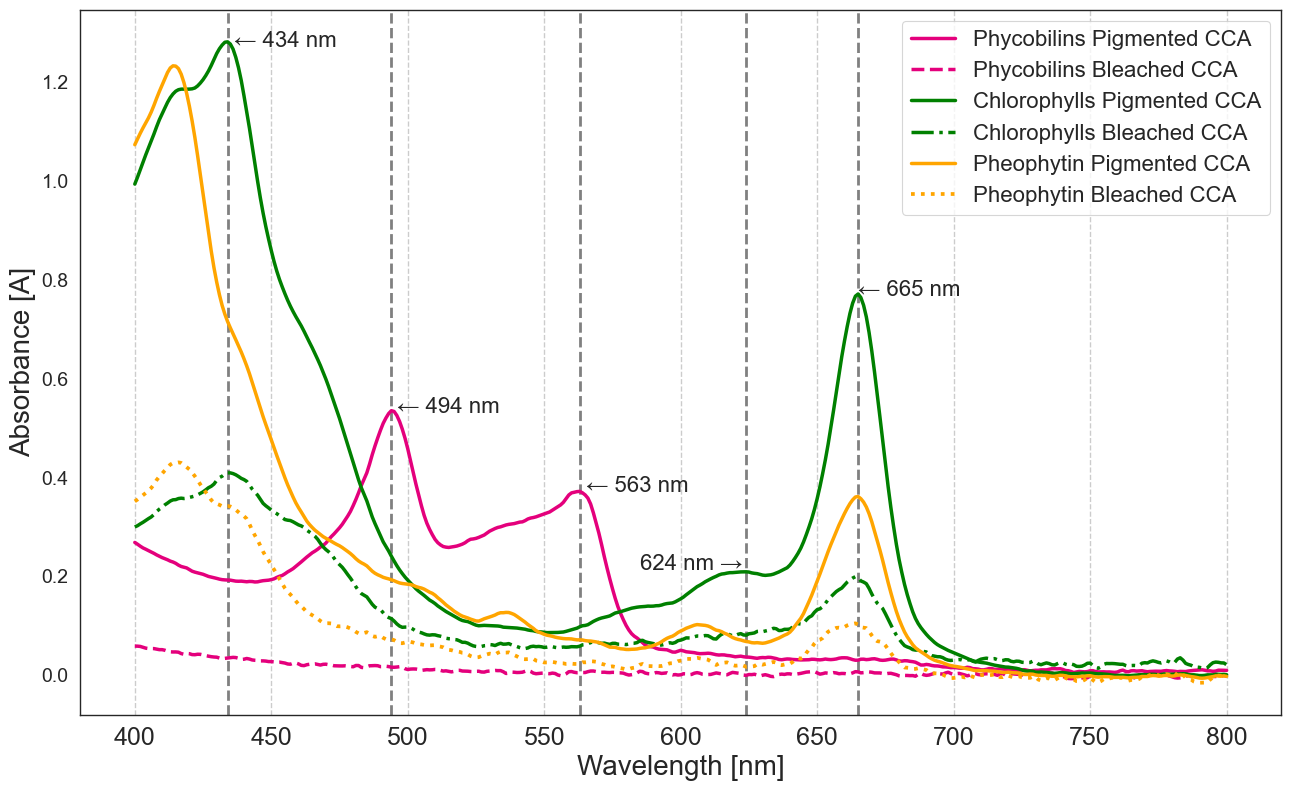

In [74]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,8)})
sns.set_style('white')
sns.set_context("paper")
sns.set_palette('husl')

# [A] peaks
plt.axvline(434, linestyle='--', lw=2, color='grey')
plt.axvline(494, linestyle='--', lw=2, color='grey')
plt.axvline(563, linestyle='--', lw=2, color='grey')
plt.axvline(624, linestyle='--', lw=2, color='grey')
plt.axvline(665, linestyle='--', lw=2, color='grey')

plt.plot(cca_phycob, label='Phycobilins Pigmented CCA', linestyle='-', lw=2.5, color='#e4007c')
plt.plot(cca_bleached, label='Phycobilins Bleached CCA', linestyle='--', lw=2.5, color='#e4007c')

plt.plot(cca_chl, label='Chlorophylls Pigmented CCA', linestyle='-', lw=2.5, color='green')
plt.plot(cca_chl_bleached, label='Chlorophylls Bleached CCA', linestyle='-.', lw=2.5, color='green')

plt.plot(cca_pheo, label='Pheophytin Pigmented CCA', linestyle='-', lw=2.5, color='orange')
plt.plot(cca_pheo_bleached, label='Pheophytin Bleached CCA', linestyle=':', lw=2.7, color='orange')

plt.xlabel('Wavelength [nm]', fontdict={'fontsize':20})
plt.ylabel('Absorbance [A]', fontdict={'fontsize':20})
plt.legend(prop={'size': 16})
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)

plt.text(434, 1.27, " ← 434 nm", fontdict={'fontsize':16})
plt.text(494, 0.53, " ← 494 nm", fontdict={'fontsize':16})
plt.text(563, 0.37, " ← 563 nm", fontdict={'fontsize':16})
plt.text(585, 0.213, "624 nm →", fontdict={'fontsize':16})
plt.text(665, 0.768, "← 665 nm", fontdict={'fontsize':16})

plt.grid(axis='x', linestyle='--', linewidth=1)
plt.tight_layout()
# plt.savefig(out_p + '\Absorbance.png', dpi=600)
plt.show()

### Plot by sites

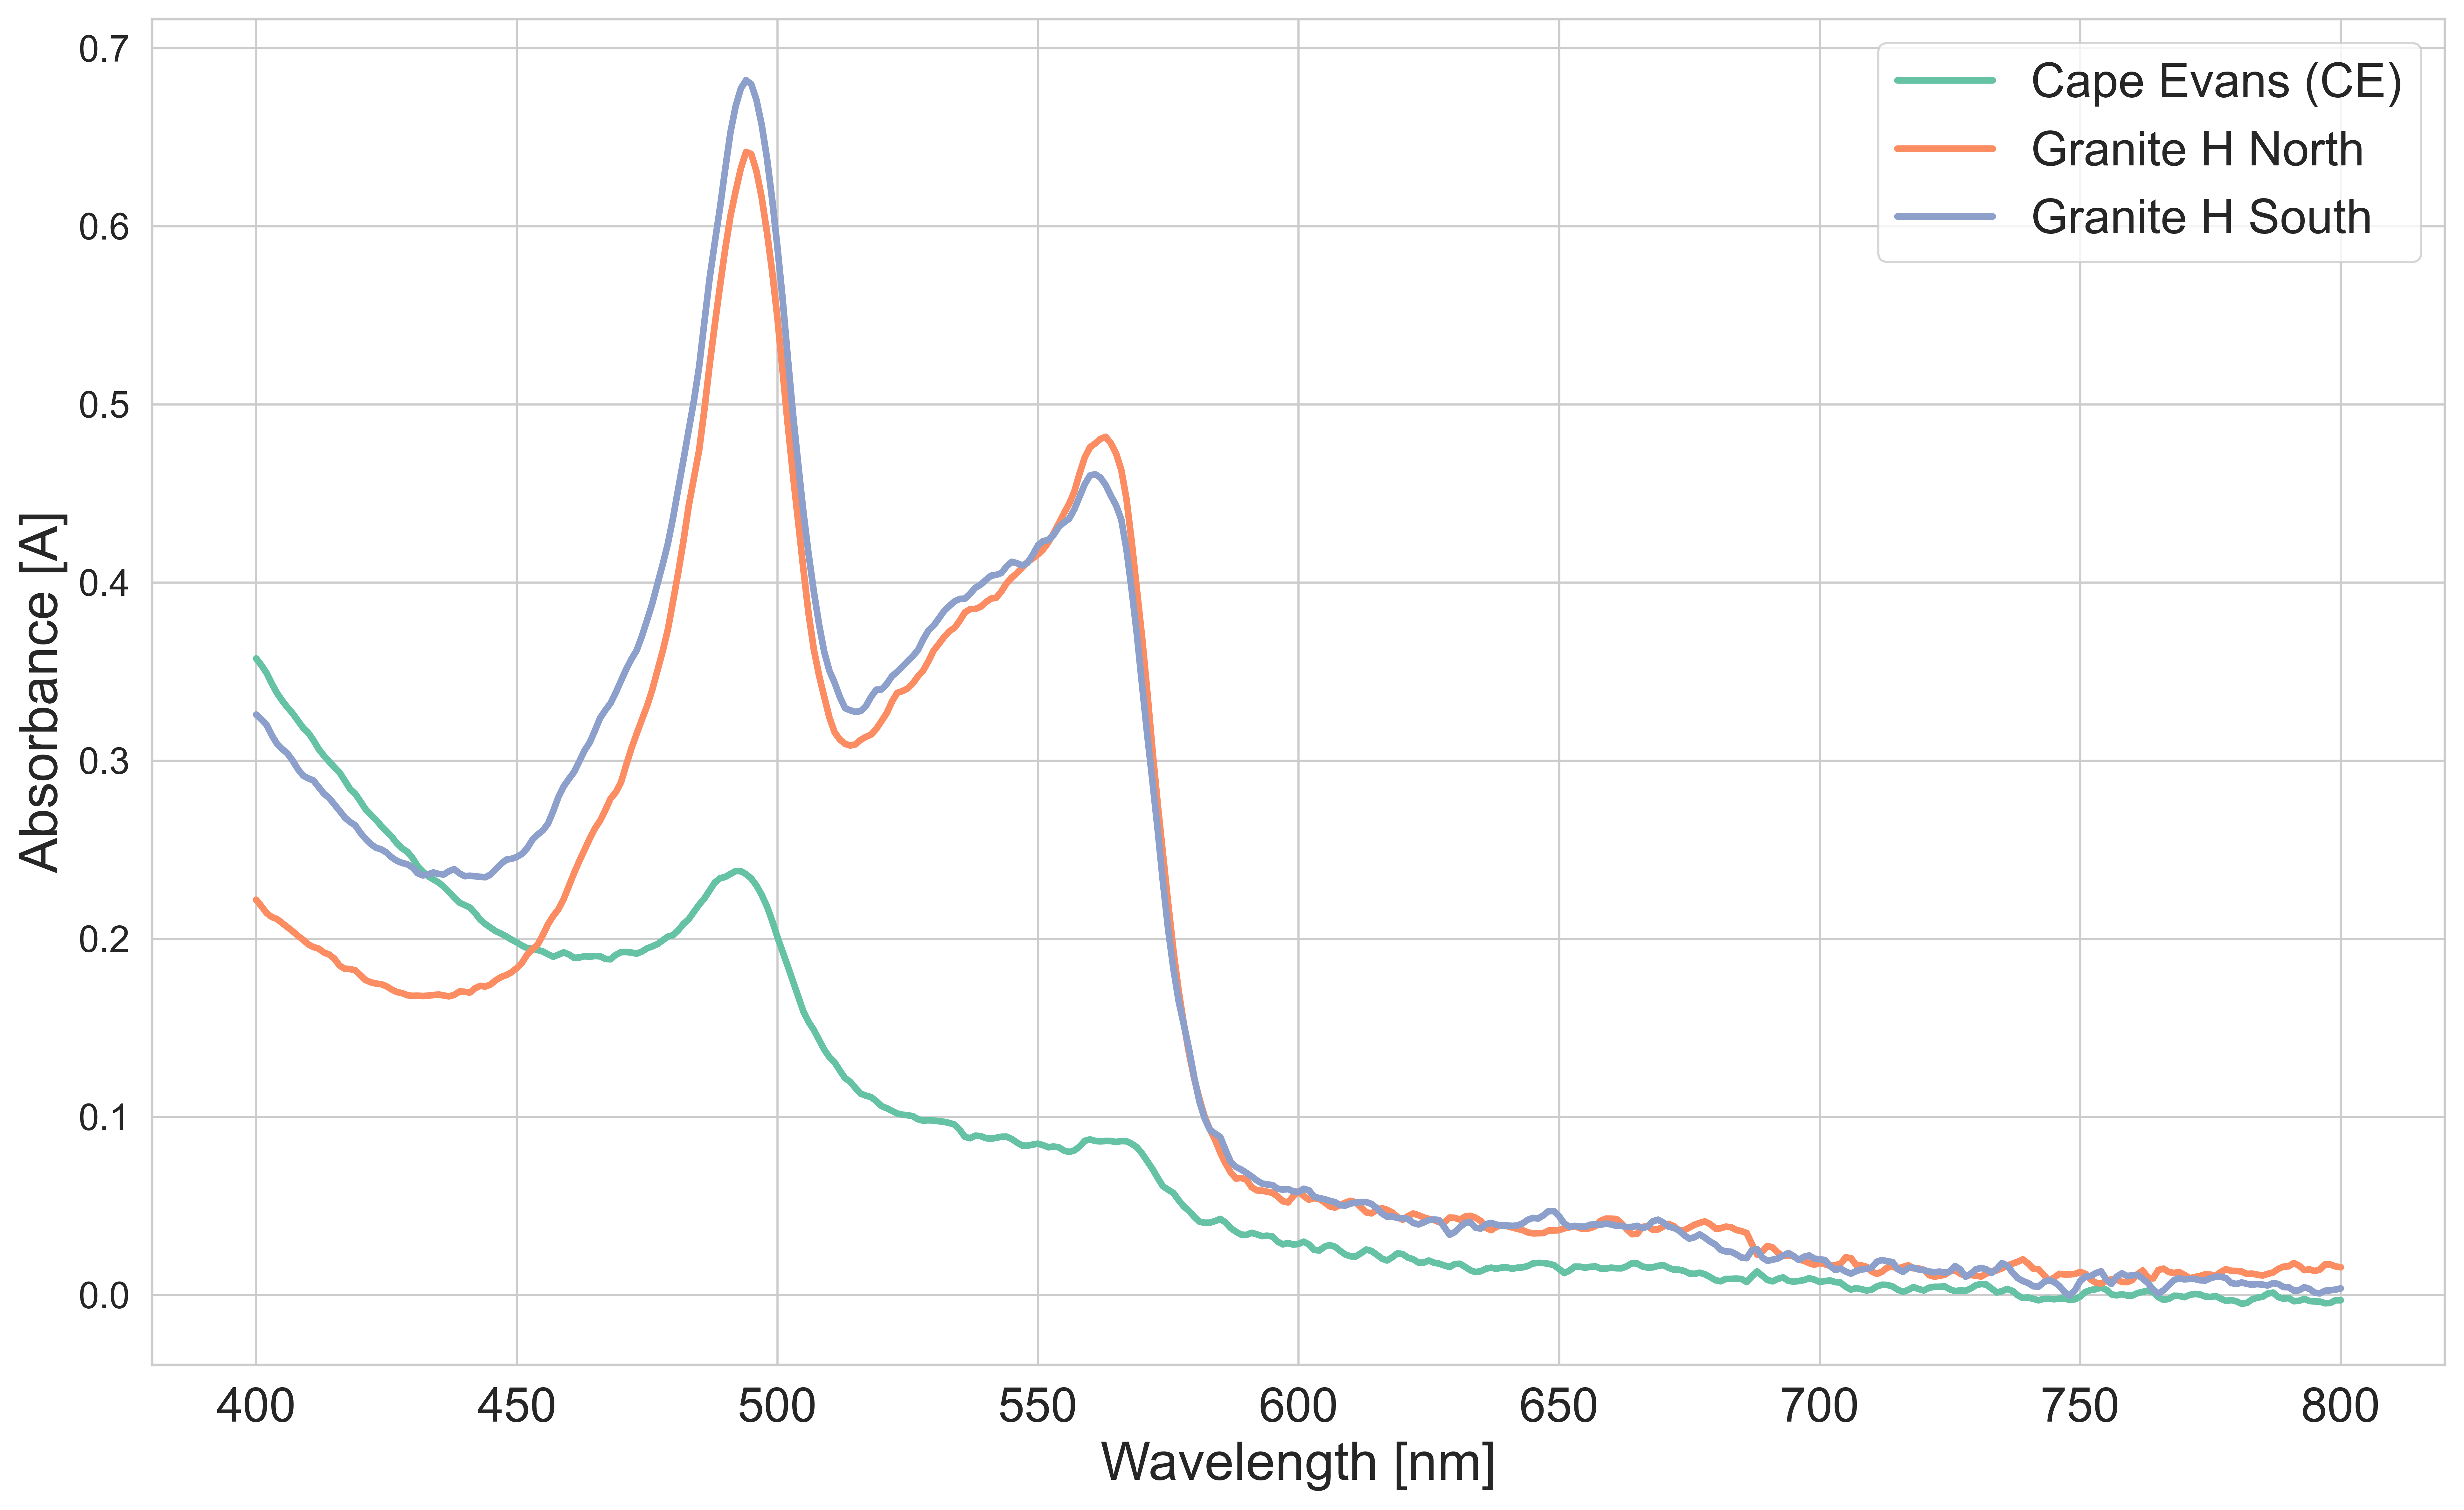

In [31]:
### Plot style

sns.set(rc={'figure.figsize':(13,8)})
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set_palette('Set2',3)

# Mean and std of all sites
cca_phycob = df_bin_d.mean(axis=1)
phycob_pstd = df_bin_d.mean(axis=1) + df_bin_d.std(axis=1)
phycob_nstd = df_bin_d.mean(axis=1) - df_bin_d.std(axis=1)

# Mean per site
CE = ['CE02','CE03','CE04']
GN = ['GN02','GN03','GN04','GN05','GN06','GN07','GN08']
GS =['GS03']

CE_phycob = df_bin_d[CE].mean(axis=1)
GN_phycob = df_bin_d[GN].mean(axis=1)
GS_phycob = df_bin_d[GS]

plt.plot(CE_phycob, label='Cape Evans (CE)', linestyle='-', lw=2.5)
plt.plot(GN_phycob, label='Granite H North', linestyle='-', lw=2.5)
plt.plot(GS_phycob, label='Granite H South', linestyle='-', lw=2.5)

# plt.plot(cca_phycob)
#plt.fill_between(df_bin.index, phycob_pstd, phycob_nstd, color='C0', alpha=0.5)
# plt.plot(cca_bleached)

plt.xlabel('Wavelength [nm]', fontdict={'fontsize':20})
plt.ylabel('Absorbance [A]', fontdict={'fontsize':20})
plt.legend(prop={'size': 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)

plt.tight_layout()
# plt.savefig(out_p + '\Sites-Absorbance.png', dpi=600)
plt.show()

### Plot Pigment [mg/mm2] plots - via Beer & Eshel formulas

In [76]:
## Add Site column
site = []

for i, sample in enumerate(df_samples.index):
    s = df_samples.index[i][0:2]
    site.append(s);

df_samples.insert(loc=0, column = 'Site', value = np.array(site))

ValueError: Could not interpret input 'Site'

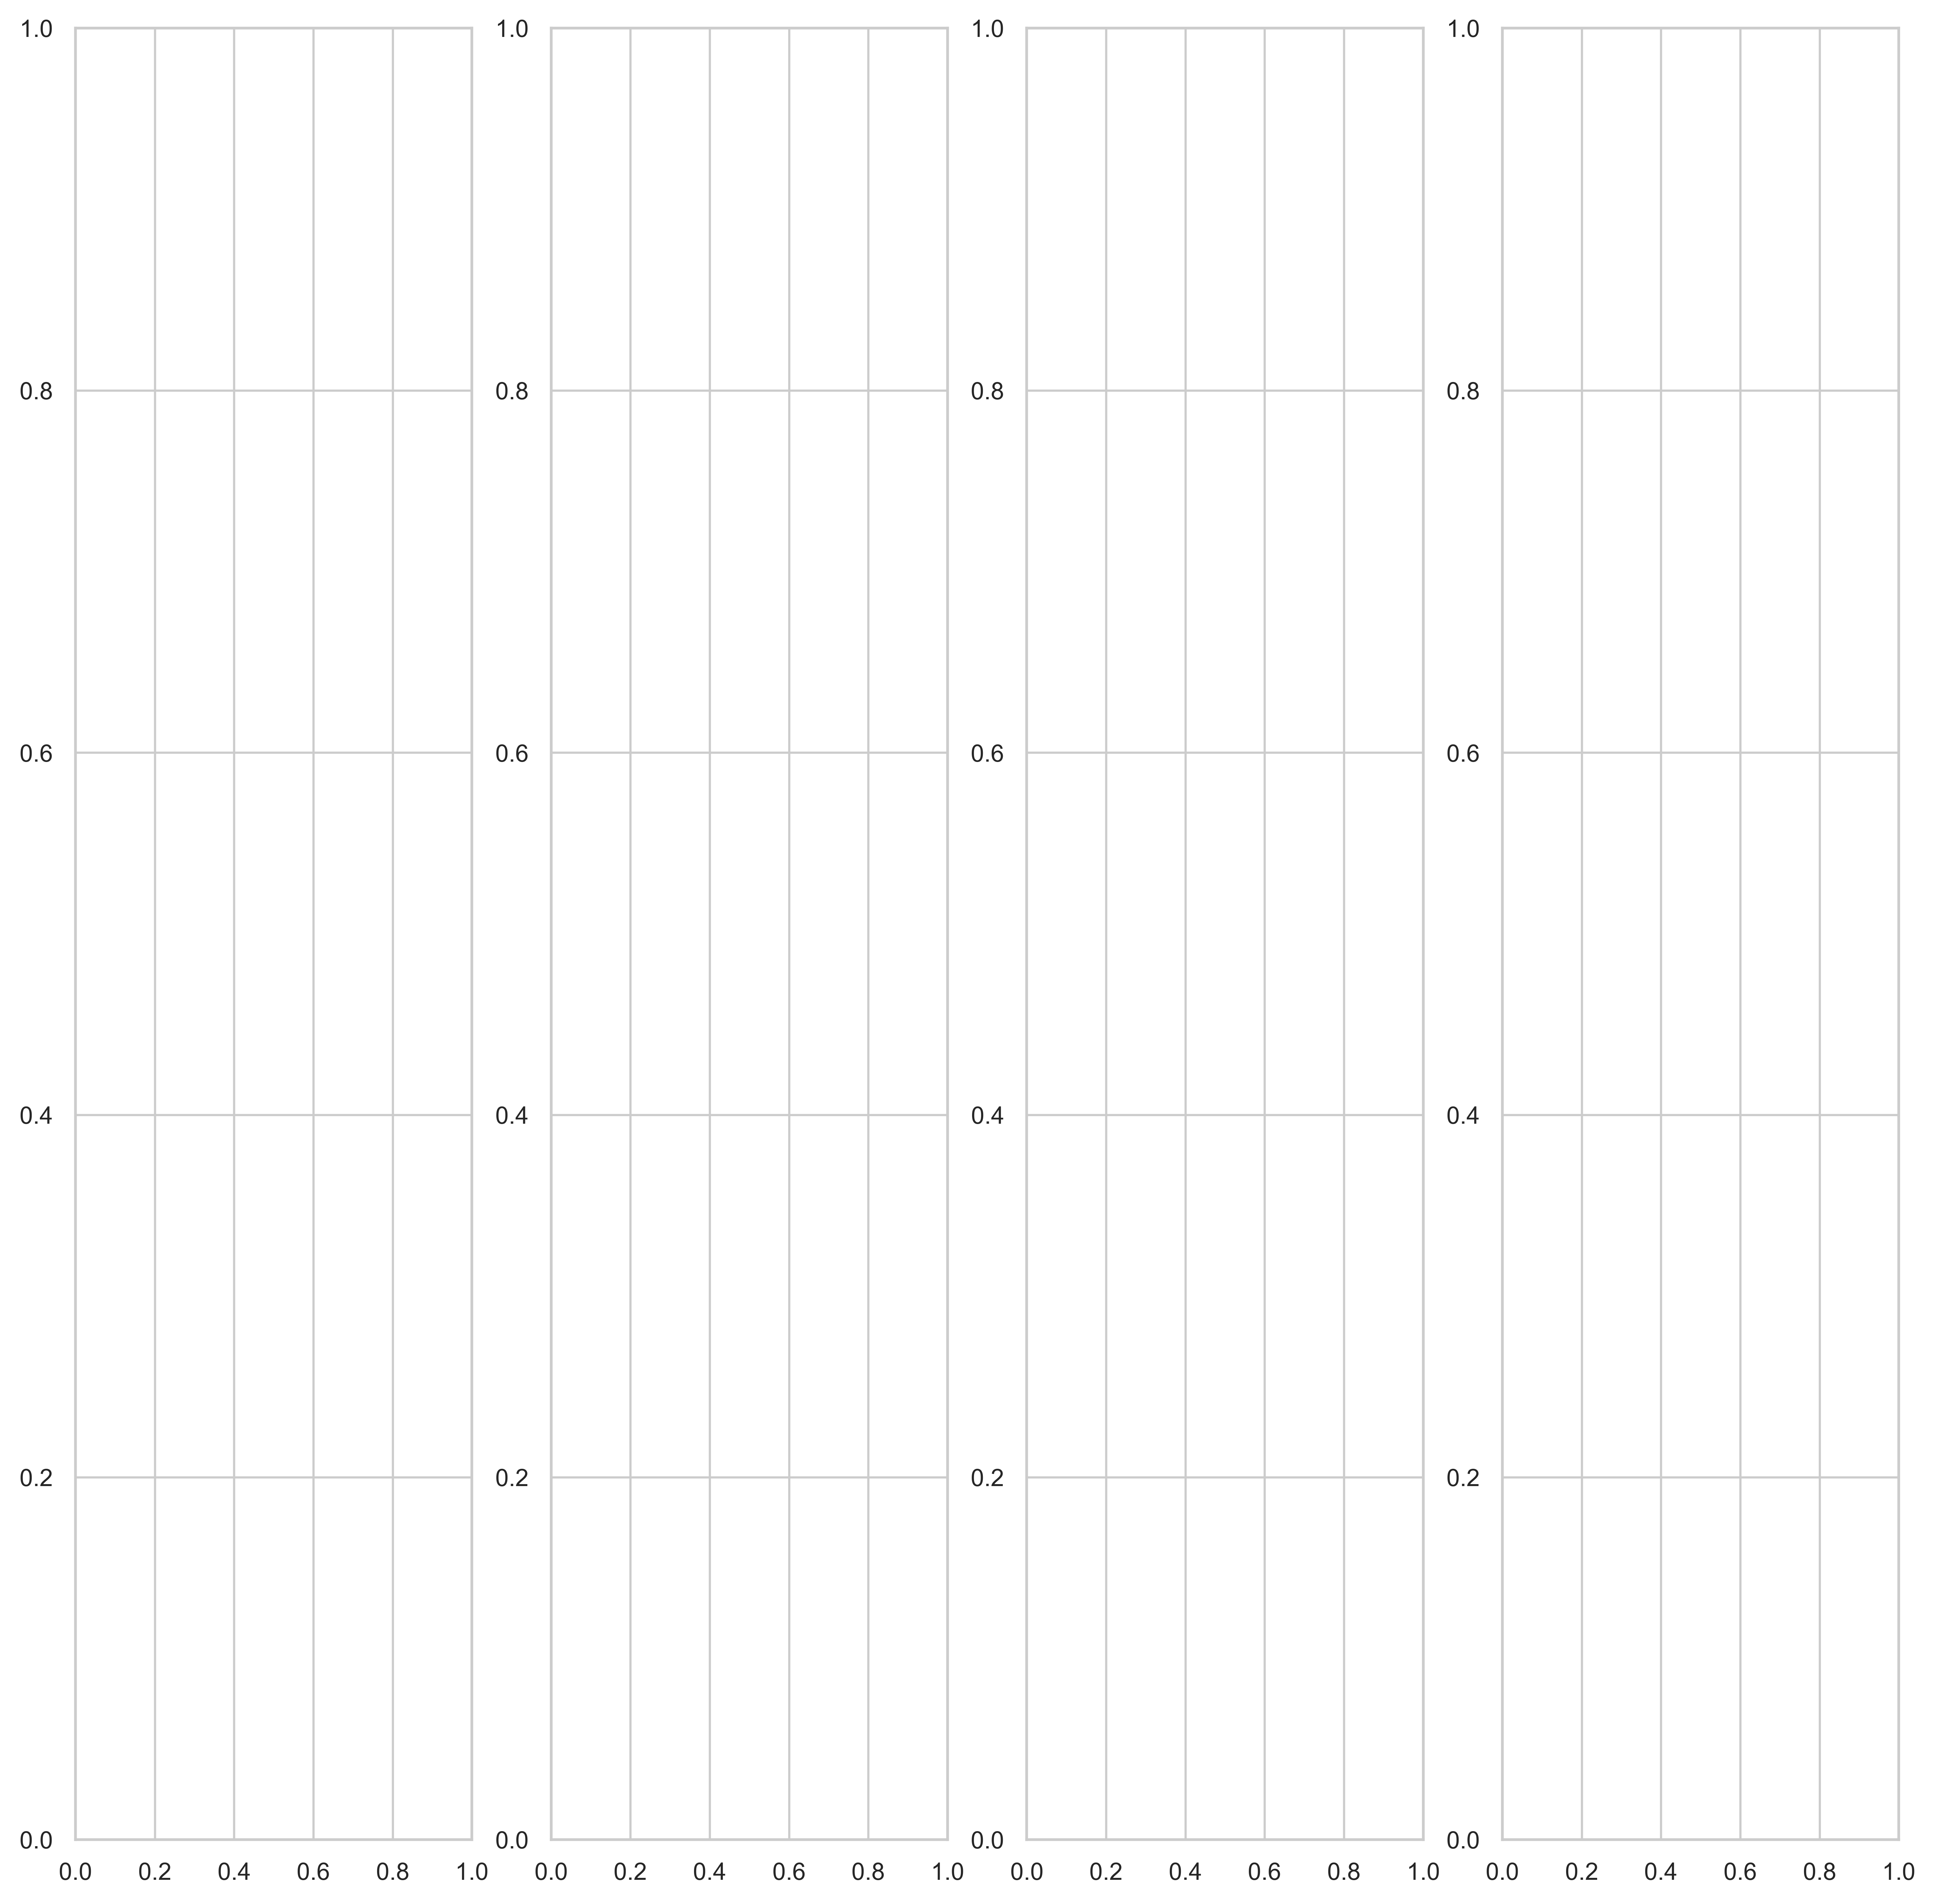

In [95]:
# sns.set(rc={'figure.figsize':(4,4)})
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set_palette('Set2',3)

fig, axes = plt.subplots(1,4, figsize=(12,12))

sns.boxplot(data = df_samples, y='PE (mg/mm2)', x='Site', ax=axes[(0)], saturation=0.8)
sns.boxplot(data = df_samples, y='PC (mg/mm2)', x='Site', ax=axes[(1)], saturation=0.8)
sns.boxplot(data = df_samples, y='Chl (mg/mm2)', x='Site', ax=axes[(2)], saturation=0.8)
sns.boxplot(data = df_samples, y='Pheo (mg/mm2)', x='Site', ax=axes[(3)], saturation=0.8)

axes[0].tick_params(labelsize=16)
axes[0].set_ylabel('R-Phycoerythrin (mg/mm$^2$)', fontsize=20)
axes[0].set_xlabel('')

axes[1].tick_params(labelsize=16)
axes[1].set_ylabel('R-Phycocyanin (mg/mm$^2$)', fontsize=20)
axes[1].set_xlabel('')

axes[2].tick_params(labelsize=16)
axes[2].set_ylabel('Chlorophyll (mg/mm$^2$)', fontsize=20)
axes[2].set_xlabel('')

axes[3].tick_params(labelsize=16)
axes[3].set_ylabel('Pheophytin (mg/mm$^2$)', fontsize=20)
axes[3].set_xlabel('')
 
plt.tight_layout()
# plt.savefig(out_p + '\Pigments-Plot.png', dpi=600)
plt.show()

In [ ]:
# sns.set(rc={'figure.figsize':(2,2)})
# sns.set_context("paper")
# sns.set_style('whitegrid')
# sns.set_palette('Set2',3)

# fig, axes = plt.subplots(1,3, figsize=(5,5))

# sns.boxplot(data = df_merged, y='IO_PE (mg/mm2)', x='Site', ax=axes[(0)], saturation=0.8)
# sns.boxplot(data = df_merged, y='IO_PC (mg/mm2)', x='Site', ax=axes[(1)], saturation=0.8)
# sns.boxplot(data = df_merged, y='IO_APC (mg/mm2)', x='Site', ax=axes[(2)], saturation=0.8)

# fig.tight_layout()
# #plt.savefig(out_p + '\Pigments-Plot.png', dpi=600)
# plt.show()

## [A] derivatives

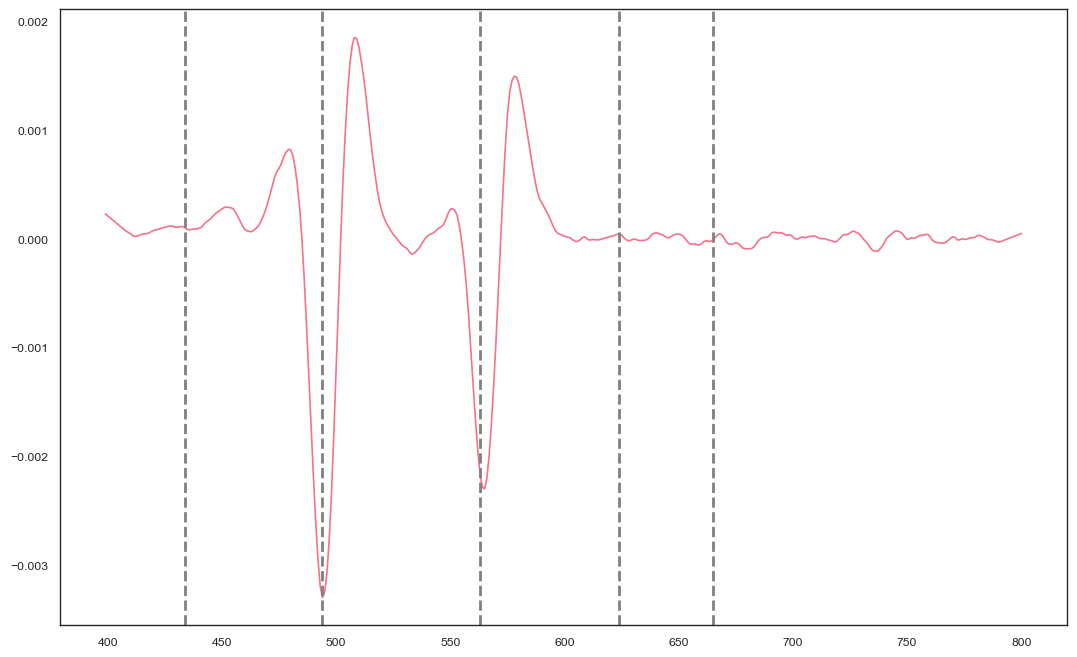

In [208]:
plt.plot(cca_phycob.index, ss.savgol_filter(cca_phycob, 20, 3, deriv=2))
plt.axvline(434, linestyle='--', lw=2, color='grey')
plt.axvline(494, linestyle='--', lw=2, color='grey')
plt.axvline(563, linestyle='--', lw=2, color='grey')
plt.axvline(624, linestyle='--', lw=2, color='grey')
plt.axvline(665, linestyle='--', lw=2, color='grey')
plt.show()

In [209]:
ss.find_peaks(cca_chl, height=0.2)

(array([ 18,  34, 224, 265], dtype=int64),
 {'peak_heights': array([1.185212  , 1.28077609, 0.20892755, 0.770817  ])})

In [210]:
cca_chl.index[265]

665

## DONE

### Plotting

C:\Users\jcmontes\AppData\Local\Temp\ipykernel_2684\1613596053.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


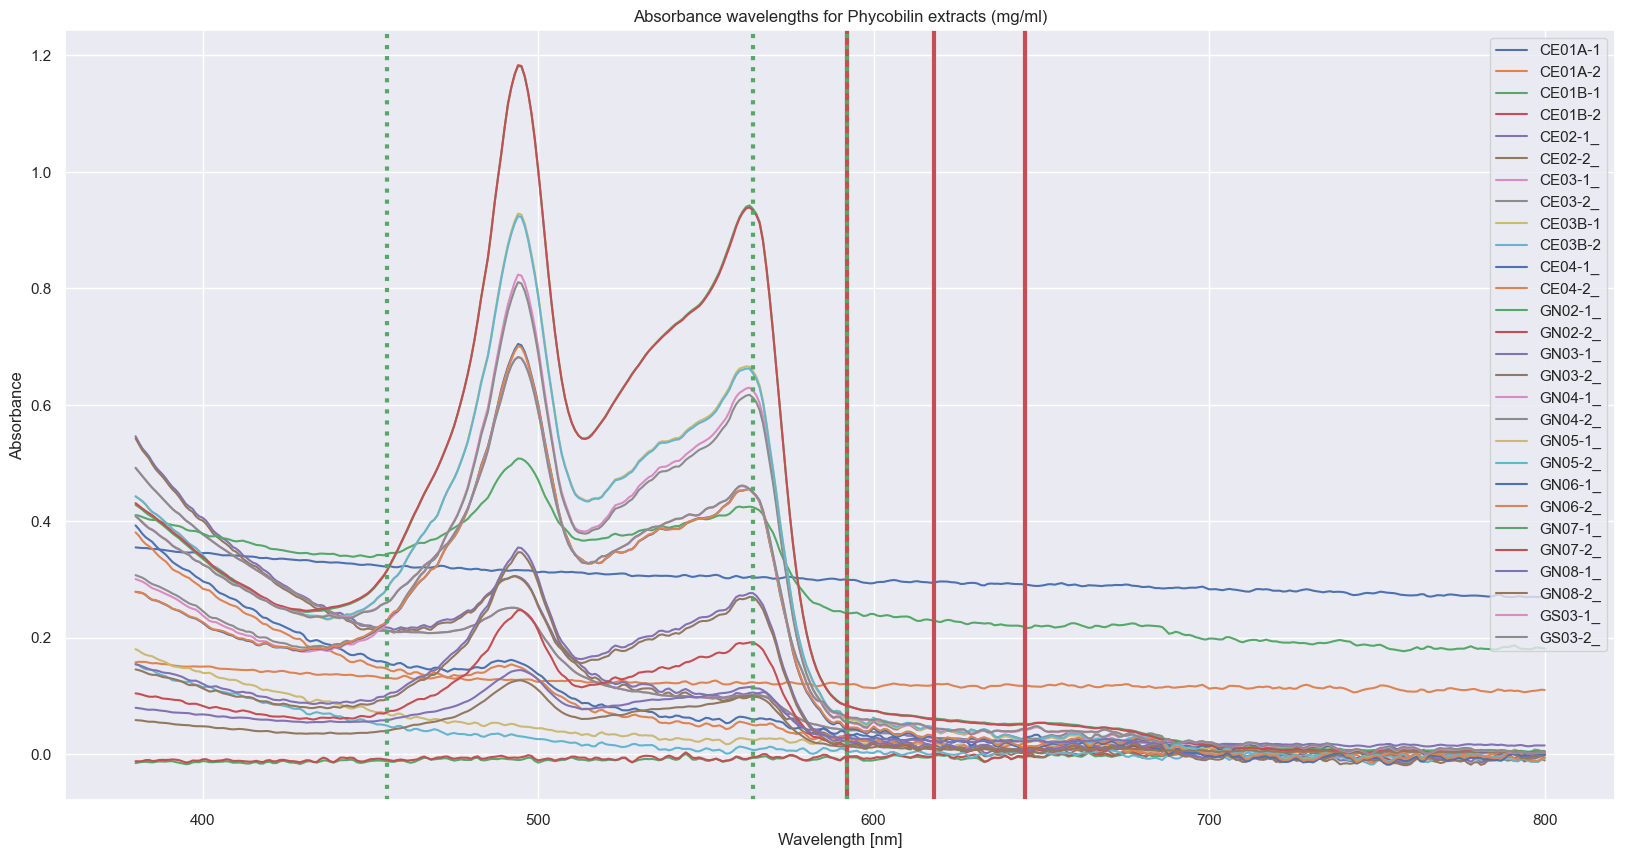

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

<Figure size 1300x800 with 0 Axes>

In [211]:
# Phycobilins
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
#ax = plt.gca()
for i, f in enumerate(csv_phycobilins):
    #print(csv_list[i])
    df = pd.read_csv(csv_phycobilins[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_phycobilins[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    #df = df.loc[950:2950] # Visible wavelengths 380 - 800 nm
    ## Average every 5 - 0.2 nm reads / binning
    df_bin = df.groupby(np.arange(len(df)) // 5).mean() # Mean of every 5 readings (0.2 nm)
    df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
    df_bin = df_bin.loc[190:610] # Only visible wavelengths
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    plt.figure()
    df_bin.plot(x = 'Wavelength [nm]', y = 'Absorbance [A]', label=csv_phycobilins[i].stem[0:7], legend=True, ax=ax)
ax.set_title('Absorbance wavelengths for Phycobilin extracts (mg/ml)')
ax.set_ylabel('Absorbance')
ax.get_legend()
#fig.savefig(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry", bbox_inches='tight')

ax.axvline(564,**kwargs) # Phycoerythrin
ax.axvline(455,**kwargs)
ax.axvline(618,**kwargs2) # Phycocyanin
ax.axvline(645,**kwargs2)
ax.axvline(592,**kwargs2)
ax.axvline(592,**kwargs)
plt.show()

<AxesSubplot: >

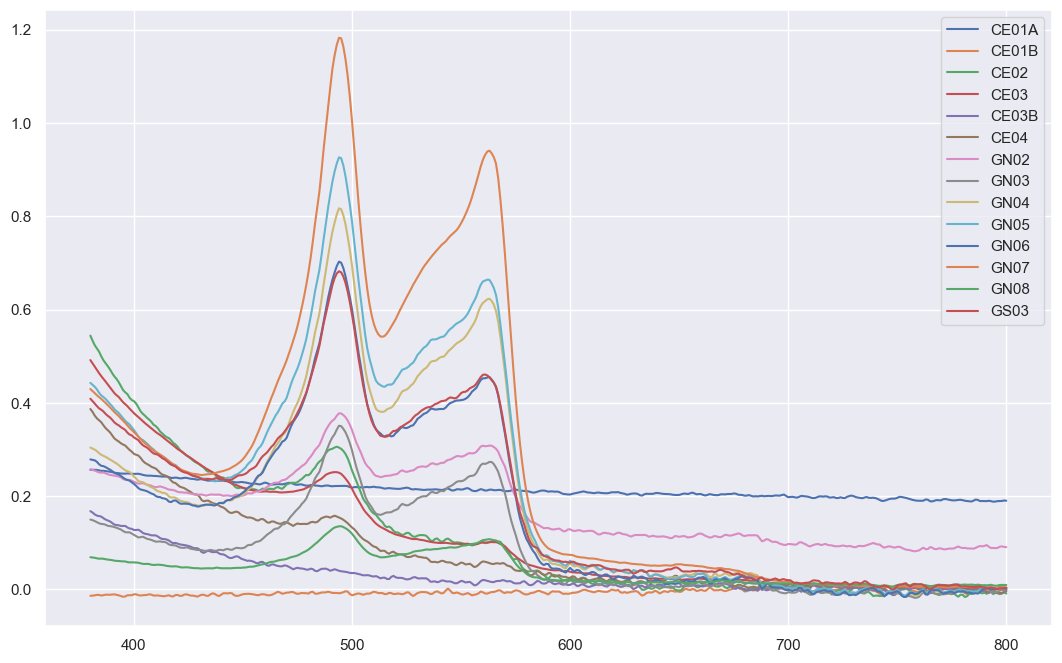

In [212]:
# Libraries
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Phycobillins")
csv_list = list(files_path.glob('*.csv'))
csv_phycobilins = csv_list # Later used for plots
df_weights = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_weights.csv", index_col=0)
df_area = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_area.csv", index_col=0)

# Sample names
col_names = ['CE01A','CE01B','CE02','CE03','CE03B','CE04','GN02','GN03','GN04','GN05','GN06','GN07','GN08','GS03']

df_samples = pd.DataFrame(columns=col_names)

samples_id = []
samples = []

#Phycobilins
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Cleaning dataframe
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    #df_bin = df_bin.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    
    samples.append(df[label])
    samples_id.append(label)


samples_df = pd.concat(samples, axis=1, ignore_index=True)
samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names
samples_df.index


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin = df_bin.loc[380:800] # Only 380 - 800 nm wavelengths

df_bin.plot()

In [213]:
samples_df

CE01A     CE01B      CE02     CE03     CE03B      CE04  \
Wavelength [nm]                                                              
190.0           -0.182420 -0.020100 -0.204185 -0.30877 -0.032780  0.175940   
190.2           -0.182480 -0.020125 -0.204130 -0.30882 -0.032695  0.176170   
190.4           -0.181710 -0.019755 -0.204795 -0.30816 -0.033805  0.173245   
190.6           -0.180455 -0.019150 -0.205880 -0.30710 -0.035610  0.168500   
190.8           -0.180665 -0.019250 -0.205695 -0.30727 -0.035310  0.169280   
...                   ...       ...       ...      ...       ...       ...   
1099.2           0.000865 -0.000095  0.000150  0.00015 -0.000100  0.000095   
1099.4           0.000860 -0.000095  0.000150  0.00015 -0.000100  0.000090   
1099.6           0.000845 -0.000095  0.000145  0.00015 -0.000105  0.000090   
1099.8           0.000830 -0.000090  0.000145  0.00015 -0.000100  0.000085   
1100.0           0.000825 -0.000090  0.000145  0.00015 -0.000100  0.000085   

                     GN02      GN03      GN04      GN05      GN06      GN07  \
Wavelength [nm]                                                               
190.0           -0.210930 -0.203565 -0.075690 -0.067750 -0.149765 -0.091285   
190.2           -0.211045 -0.203590 -0.075640 -0.067610 -0.149810 -0.091160   
190.4           -0.209580 -0.203305 -0.076265 -0.069430 -0.149280 -0.092805   
190.6           -0.207200 -0.202845 -0.077285 -0.072390 -0.148415 -0.095480   
190.8           -0.207595 -0.202920 -0.077115 -0.071900 -0.148560 -0.095040   
...                   ...       ...       ...       ...       ...       ...   
1099.2           0.000790  0.000475  0.001260  0.001205  0.000755  0.001540   
1099.4           0.000785  0.000470  0.001245  0.001185  0.000745  0.001520   
1099.6           0.000770  0.000460  0.001225  0.001175  0.000735  0.001500   
1099.8           0.000765  0.000455  0.001210  0.001160  0.000725  0.001480   
1100.0           0.000750  0.000450  0.001195  0.001140  0.000715  0.001460   

                     GN08      GS03  
Wavelength [nm]                      
190.0            0.098825  0.102090  
190.2            0.098885  0.102215  
190.4            0.098075  0.100565  
190.6            0.096755  0.097880  
190.8            0.096975  0.098325  
...                   ...       ...  
1099.2           0.000255  0.001030  
1099.4           0.000255  0.001015  
1099.6           0.000250  0.001005  
1099.8           0.000250  0.000990  
1100.0           0.000245  0.000975  

[4551 rows x 14 columns]

NameError: name 'df_sample_replicate' is not defined

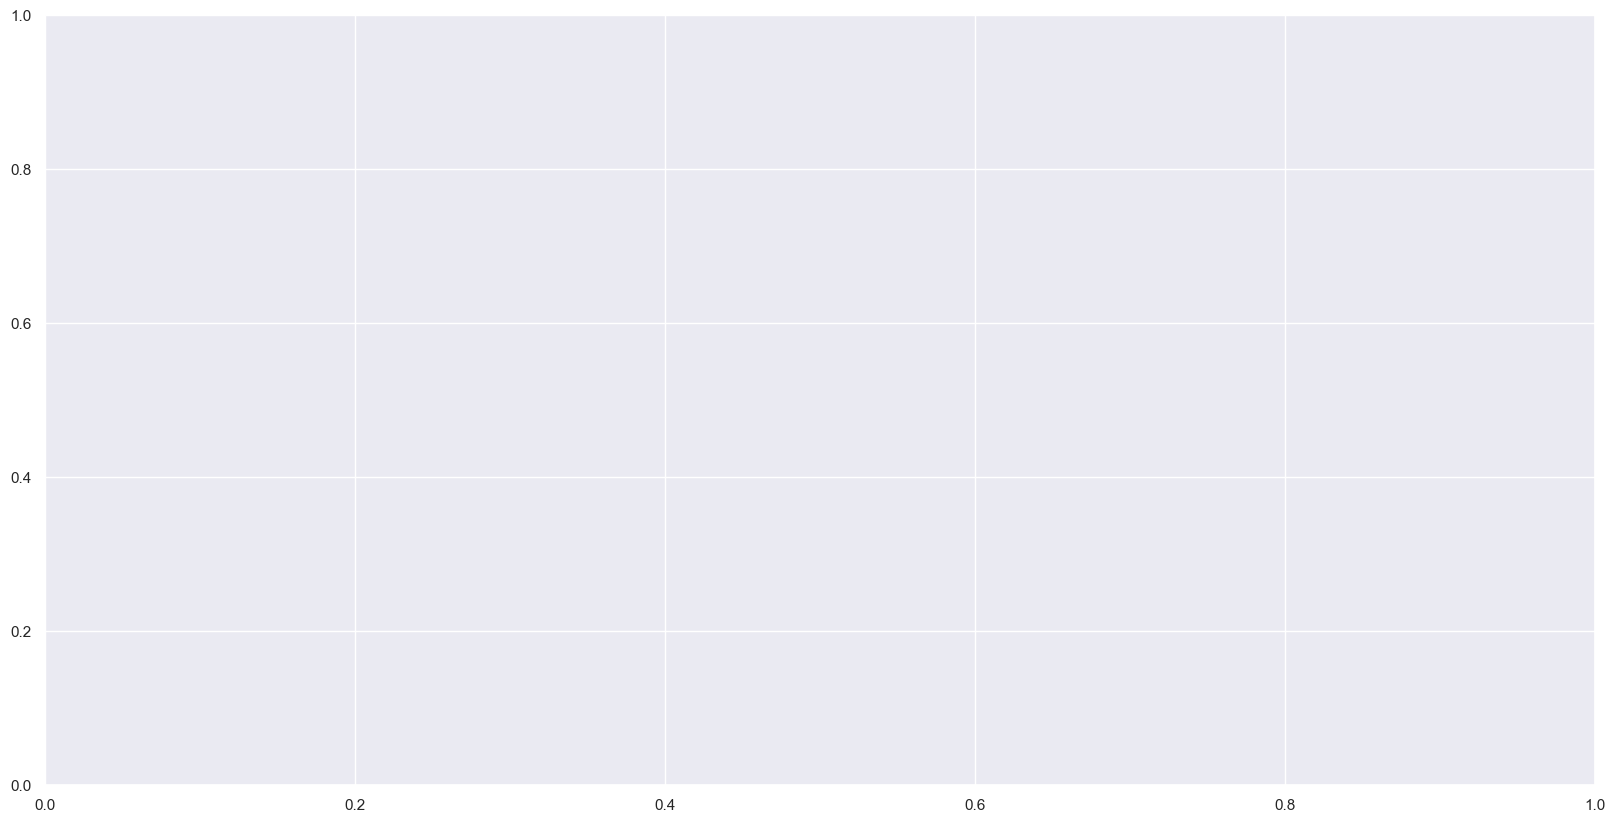

In [214]:


fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df_sample_replicate, label=col_names)
plt.legend()

ax.axvline(564,**kwargs) # Phycoerythrin
ax.axvline(455,**kwargs)
ax.axvline(618,**kwargs2) # Phycocyanin
ax.axvline(645,**kwargs2)
ax.axvline(592,**kwargs2)
ax.axvline(592,**kwargs)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

#df_sample_replicate['CE01A'].plot()
#df_sample_replicate['CE01B'].plot()
#df_sample_replicate['GN07'].plot()
#df_sample_replicate['GS03'].plot()

target = ss.savgol_filter(df_sample_replicate['GN07'], 40, 7, deriv = 4)
plt.plot(target)
plt.legend(fontsize=30)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

df_sample_replicate['CE01A'].plot()
df_sample_replicate['CE01B'].plot()
df_sample_replicate['GN07'].plot()
df_sample_replicate['GS03'].plot()
plt.legend(fontsize=30)
plt.show()

In [ ]:
# Chlorophyll
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
#ax = plt.gca()
for i, f in enumerate(csv_chl):
    #print(csv_list[i])
    df = pd.read_csv(csv_chl[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_chl[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    #df = df.loc[950:2950] # Visible wavelengths 380 - 800 nm
    ## Average every 5 - 0.2 nm reads / binning
    df_bin = df.groupby(np.arange(len(df)) // 5).mean() # Mean of every 5 readings (0.2 nm)
    df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
    df_bin = df_bin.loc[190:610] # Only visible wavelengths
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    plt.figure()
    df_bin.plot(x = 'Wavelength [nm]', y = 'Absorbance [A]', label=csv_chl[i].stem[0:7], legend=True, ax=ax)
ax.set_title('Absorbance wavelengths for Chlorophyll extracts (mg/ml)')
ax.set_ylabel('Absorbance')
ax.get_legend()
#fig.savefig(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry", bbox_inches='tight')
ax.axvline(649,**kwargs) # Chlorophyll
ax.axvline(665,**kwargs2)
plt.show()

In [ ]:
# Pheophytin
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
#ax = plt.gca()
for i, f in enumerate(csv_pheo):
    #print(csv_list[i])
    df = pd.read_csv(csv_pheo[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_pheo[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    #df = df.loc[950:2950] # Visible wavelengths 380 - 800 nm
    ## Average every 5 - 0.2 nm reads / binning
    df_bin = df.groupby(np.arange(len(df)) // 5).mean() # Mean of every 5 readings (0.2 nm)
    df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
    df_bin = df_bin.loc[190:610] # Only visible wavelengths
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    plt.figure()
    df_bin.plot(x = 'Wavelength [nm]', y = 'Absorbance [A]', label=csv_pheo[i].stem[0:8], legend=True, ax=ax)
ax.set_title('Absorbance wavelengths for Pheophytin extracts (mg/ml)')
ax.set_ylabel('Absorbance')
ax.get_legend()
#fig.savefig(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry", bbox_inches='tight')
ax.axvline(649,**kwargs) # Chlorophyll
ax.axvline(665,**kwargs2)
plt.show()

### Formula development

In [ ]:
# Phycoerythrin concentration (mg/ml)
a564 = df_bin.loc[df_bin['Wavelength [nm]'] == 564.0] # Get position
a564 = a564['Absorbance [A]'].values # Get A values
a592 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a592 = a592['Absorbance [A]'].values
a455 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a455 = a455['Absorbance [A]'].values

# Applying formula
pe_conc = ((a564 - a592) - (a455 - a592) * 0.2) * 0.12
print('Phycoerythrin (mg/ml)', pe_conc)

In [ ]:
# Phycocyanin concentration (mg/ml)
a618 = df_bin.loc[df_bin['Wavelength [nm]'] == 564.0] # Get position
a618 = a618['Absorbance [A]'].values # Get A values
a645 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a645 = a645['Absorbance [A]'].values
a592 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a592 = a592['Absorbance [A]'].values

# Applying formula
pc_conc = ((a618 - a645) - (a592 - a645) * 0.51) * 0.15
print('Phycocyanin (mg/ml)', pc_conc)

## Other methods and studies looking into Absorbance
### Vasquez-Elizondo et al. 2017
- Pigment extraction and spectrophotometry. I suppose no weight reported.
- Used equations from Kursar et al. 1983 and Lichtenthaler and Wellburn (1983) for Phycobilins and Chlorophyll, respectively:
    - $Allophycocyanin \ (mg/ml) = 181.3 \ A_{651} - 22.3 \ A_{614} $ <br>
    - $Phycocyanin \ (mg/ ml) = 151.1 \ A_{614} - 99.1 \ A_{651} $ <br>
    - $Phycoerythrin \ (mg/ml) = 155.8 \ A_{498.5} - 40.0 \ A_{614} - 10.5 \ A_{651} $
- Next topic: *Reflectance* spectroscopy $R$ normalized to reflectance of bleached thalli.
- Determined light transmition (Absorbance, $D$) by placing thalli fragments against cuvette wall filled with filter seawater.
- Bleached coralline samples were used to subtract non-photosynthetic absorption.
    - Look for samples low in Phycobillins and low in Chlorophyll.
- Used an Absorbance formula to quantify efficiency of light collection, based on $D$ and pigment $mg/m^2$.
### Burdett et al. 2014
- Used reflectance spectroscopy $R$ values. Percentage of $A$ was calculated on the difference between sample absorbance and a white standard 100% $R$. 
- Absorption peaks of Rhodophyta pigments were obtained from Hedley & Mumby (2002).
- Just observed that absorption peaks matched the ones reported in the literature.
#### Main absorption peaks of Rhodophyta photosynthetic pigments from Hedley & Mumby (2002)
Not that this is from spectroscopy measurements
- Chlorophyll a:
    - chla = 435; chla2 = 670; chla3 = 680
- Carotenoids:
    - calpha1 = 423; calpha2 = 444; calpha3 = 473; calpha4 = 500
- Xantophylls:
    - zxn1 = 428; zxn2 = 450; zxn3 = 478 # Zeaxanthin
    - ltn1 = 422; ltn2 = 445; ltn3 = 474 # Lutein
- Phycobilins:
    - pcn = 618 # Phycocyanin
    - pe1 = 490; pe2 = 546; pe3 = 576 # Phycoerythrin
    - apcn = 654 # Allophycocyanin

In [ ]:
# Allophycocyanin (APC)
apc_1 = df_bin.loc[df_bin['Wavelength [nm]'] == 651.0]
apc_2 = df_bin.loc[df_bin['Wavelength [nm]'] == 614.0]
print(apc_1, apc_2)

In [ ]:
c = (181.3 * apc_1['Absorbance [A]'].values) - (22.3 * apc_2['Absorbance [A]'].values)
print(c)

## Photosynthetic pigment quantification via Paine protocol
Outputs:
- Same plot but with vertical lines with different colors of the equations used.
- Dataframe with values
### Chlorophyll

$ Chlorophyll (mg/ml) = (13.7 x A_{665}) - (5.76 x A_{649}) $

In [ ]:
print(df.loc[df['Wavelength [nm]'] == 670])

In [ ]:
df = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\UVVIS-Chlorophylls_test\blank_test.csv", engine='python', header=76, sep='\t')
df = df.drop(labels='Unnamed: 2', axis=1)